# DATA EXPLORATION

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
#import ydata_profiling
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
import pandas as pd
import matplotlib.cm as cm
from shapely.geometry import Point
sns.set_theme()
import xgboost as xgb
from xgboost import XGBRegressor



# Data Exploration

In [3]:
data = pd.read_parquet(Path("data") / "train.parquet")
data

counter_id                counter_name    site_id  \
48321   100007049-102007049    28 boulevard Diderot E-O  100007049   
48324   100007049-102007049    28 boulevard Diderot E-O  100007049   
48327   100007049-102007049    28 boulevard Diderot E-O  100007049   
48330   100007049-102007049    28 boulevard Diderot E-O  100007049   
48333   100007049-102007049    28 boulevard Diderot E-O  100007049   
...                     ...                         ...        ...   
929175  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929178  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929181  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929184  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929187  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   

                   site_name  bike_count                date  \
48321   28 boulevard Diderot         0.0 2020-09-01 02:00:00   
48324   28 boulevard Diderot         1.0 2020-09-01 03:00:00   
48327   28 boulevard Diderot         0.0 2020-09-01 04:00:00   
48330   28 boulevard Diderot         4.0 2020-09-01 15:00:00   
48333   28 boulevard Diderot         9.0 2020-09-01 18:00:00   
...                      ...         ...                 ...   
929175  254 rue de Vaugirard       445.0 2021-09-09 06:00:00   
929178  254 rue de Vaugirard       145.0 2021-09-09 10:00:00   
929181  254 rue de Vaugirard       218.0 2021-09-09 15:00:00   
929184  254 rue de Vaugirard        21.0 2021-09-09 22:00:00   
929187  254 rue de Vaugirard        15.0 2021-09-09 23:00:00   

       counter_installation_date         coordinates counter_technical_id  \
48321                 2013-01-18  48.846028,2.375429          Y2H15027244   
48324                 2013-01-18  48.846028,2.375429          Y2H15027244   
48327                 2013-01-18  48.846028,2.375429          Y2H15027244   
48330                 2013-01-18  48.846028,2.375429          Y2H15027244   
48333                 2013-01-18  48.846028,2.375429          Y2H15027244   
...                          ...                 ...                  ...   
929175                2020-11-29    48.83977,2.30198          Y2H20114504   
929178                2020-11-29    48.83977,2.30198          Y2H20114504   
929181                2020-11-29    48.83977,2.30198          Y2H20114504   
929184                2020-11-29    48.83977,2.30198          Y2H20114504   
929187                2020-11-29    48.83977,2.30198          Y2H20114504   

         latitude  longitude  log_bike_count  
48321   48.846028   2.375429        0.000000  
48324   48.846028   2.375429        0.693147  
48327   48.846028   2.375429        0.000000  
48330   48.846028   2.375429        1.609438  
48333   48.846028   2.375429        2.302585  
...           ...        ...             ...  
929175  48.839770   2.301980        6.100319  
929178  48.839770   2.301980        4.983607  
929181  48.839770   2.301980        5.389072  
929184  48.839770   2.301980        3.091042  
929187  48.839770   2.301980        2.772589  

[496827 rows x 12 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [5]:
# data.profile_report()

In [6]:
data.nunique(axis=0)

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
bike_count                    998
date                         8974
counter_installation_date      22
coordinates                    30
counter_technical_id           30
latitude                       30
longitude                      30
log_bike_count                998
dtype: int64

In [7]:
data.describe()

site_id     bike_count                        date  \
count  4.968270e+05  496827.000000                      496827   
mean   1.053450e+08      60.191475  2021-03-08 07:25:59.668858   
min    1.000070e+08       0.000000         2020-09-01 01:00:00   
25%    1.000475e+08       5.000000         2020-12-05 22:00:00   
50%    1.000562e+08      29.000000         2021-03-08 11:00:00   
75%    1.000563e+08      79.000000         2021-06-09 14:00:00   
max    3.000147e+08    1302.000000         2021-09-09 23:00:00   
std    3.210346e+07      87.590566                         NaN   

        counter_installation_date       latitude      longitude  \
count                      496827  496827.000000  496827.000000   
mean   2019-04-04 07:24:35.245911      48.854343       2.345479   
min           2013-01-18 00:00:00      48.826360       2.265420   
25%           2018-11-29 00:00:00      48.840801       2.314440   
50%           2019-11-06 00:00:00      48.852090       2.353870   
75%           2019-12-11 00:00:00      48.864610       2.375870   
max           2020-11-29 00:00:00      48.891720       2.409690   
std                           NaN       0.018554       0.038026   

       log_bike_count  
count   496827.000000  
mean         3.079917  
min          0.000000  
25%          1.791759  
50%          3.401197  
75%          4.382027  
max          7.172425  
std          1.659899

In [8]:
data.sort_values(by="date")
data["day"] = data["date"].dt.date
data["month"] = data["date"].dt.to_period("M")
daily_counts_days = data.groupby("day")["bike_count"].sum().reset_index()
daily_counts_months = data.groupby("month")["bike_count"].sum().reset_index()
daily_counts_months["month"] = daily_counts_months["month"].dt.to_timestamp()

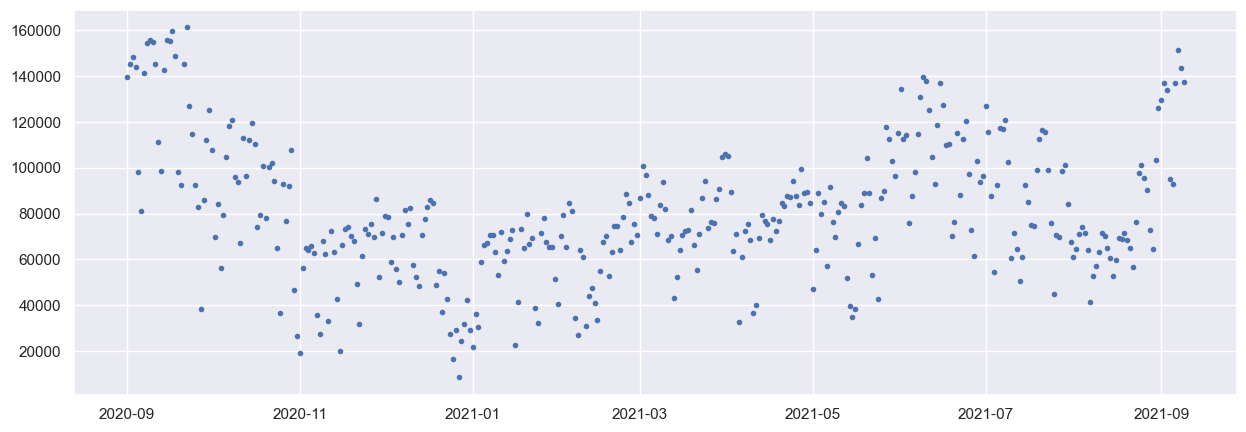

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(daily_counts_days["day"], daily_counts_days["bike_count"], ".")

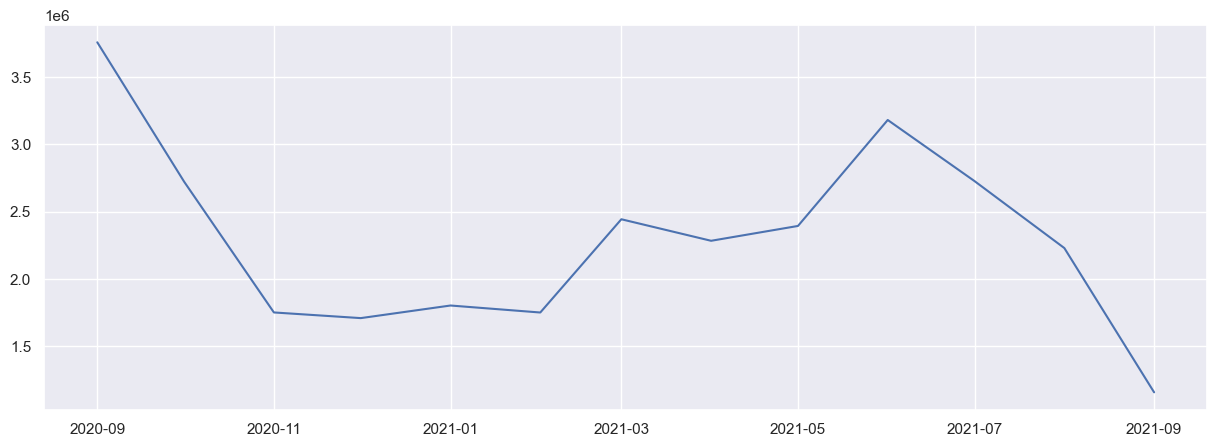

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(daily_counts_months["month"], daily_counts_months["bike_count"])

In [11]:
pd.crosstab(index=data["counter_name"], columns=data["counter_id"])

counter_id                                       100007049-101007049  \
counter_name                                                           
152 boulevard du Montparnasse E-O                                  0   
152 boulevard du Montparnasse O-E                                  0   
18 quai de l'Hôtel de Ville NO-SE                                  0   
18 quai de l'Hôtel de Ville SE-NO                                  0   
20 Avenue de Clichy NO-SE                                          0   
20 Avenue de Clichy SE-NO                                          0   
254 rue de Vaugirard NE-SO                                         0   
254 rue de Vaugirard SO-NE                                         0   
27 quai de la Tournelle NO-SE                                      0   
27 quai de la Tournelle SE-NO                                      0   
28 boulevard Diderot E-O                                           0   
28 boulevard Diderot O-E                                        8974   
36 quai de Grenelle NE-SO                                          0   
36 quai de Grenelle SO-NE                                          0   
38 rue Turbigo NE-SO                                               0   
38 rue Turbigo SO-NE                                               0   
39 quai François Mauriac NO-SE                                     0   
39 quai François Mauriac SE-NO                                     0   
6 rue Julia Bartet NE-SO                                           0   
6 rue Julia Bartet SO-NE                                           0   
67 boulevard Voltaire SE-NO                                        0   
90 Rue De Sèvres NE-SO                                             0   
90 Rue De Sèvres SO-NE                                             0   
Face 104 rue d'Aubervilliers N-S                                   0   
Face 104 rue d'Aubervilliers S-N                                   0   
Face au 25 quai de l'Oise NE-SO                                    0   
Face au 25 quai de l'Oise SO-NE                                    0   
Face au 4 avenue de la porte de Bagnolet E-O                       0   
Face au 4 avenue de la porte de Bagnolet O-E                       0   
Face au 40 quai D'Issy NE-SO                                       0   
Face au 40 quai D'Issy SO-NE                                       0   
Face au 48 quai de la marne NE-SO                                  0   
Face au 48 quai de la marne SO-NE                                  0   
Face au 70 quai de Bercy N-S                                       0   
Face au 70 quai de Bercy S-N                                       0   
Face au 8 avenue de la porte de Charenton NO-SE                    0   
Face au 8 avenue de la porte de Charenton SE-NO                    0   
Pont Charles De Gaulle NE-SO                                       0   
Pont Charles De Gaulle SO-NE                                       0   
Pont de Bercy NE-SO                                                0   
Pont de Bercy SO-NE                                                0   
Pont de la Concorde S-N                                            0   
Pont des Invalides N-S                                             0   
Pont des Invalides S-N                                             0   
Quai d'Orsay E-O                                                   0   
Quai d'Orsay O-E                                                   0   
Totem 64 Rue de Rivoli E-O                                         0   
Totem 64 Rue de Rivoli O-E                                         0   
Totem 73 boulevard de Sébastopol N-S                               0   
Totem 73 boulevard de Sébastopol S-N                               0   
Totem 85 quai d'Austerlitz NO-SE                                   0   
Totem 85 quai d'Austerlitz SE-NO                                   0   
Totem Cours la Reine E-O                                           0   
Totem Cours la Reine O-E                

In [12]:
(data.groupby(["site_name"])["bike_count"].sum().sort_values(ascending=True).to_frame())

/var/folders/8z/2_mhw76x0cl3ryfqpm55hst40000gn/T/ipykernel_8881/627690864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (data.groupby(["site_name"])["bike_count"].sum().sort_values(ascending=True).to_frame())


bike_count
site_name                                            
Face au 40 quai D'Issy                       127507.0
Pont des Invalides N-S                       187174.0
Pont des Invalides S-N                       228124.0
28 boulevard Diderot                         391000.0
Face au 8 avenue de la porte de Charenton    420003.0
Face au 4 avenue de la porte de Bagnolet     504235.0
Face 104 rue d'Aubervilliers                 537046.0
18 quai de l'Hôtel de Ville                  549723.0
Pont Charles De Gaulle                       584323.0
Pont de la Concorde S-N                      633302.0
Pont de Bercy                                646528.0
152 boulevard du Montparnasse                662839.0
Face au 70 quai de Bercy                     718785.0
254 rue de Vaugirard                         767228.0
90 Rue De Sèvres                             858065.0
Voie Georges Pompidou                        860573.0
6 rue Julia Bartet                           874422.0
39 quai François Mauriac                     969386.0
Face au 25 quai de l'Oise                    975689.0
36 quai de Grenelle                         1097291.0
20 Avenue de Clichy                         1103540.0
67 boulevard Voltaire SE-NO                 1130565.0
Totem Cours la Reine                        1315257.0
Totem 85 quai d'Austerlitz                  1349093.0
38 rue Turbigo                              1455579.0
Quai d'Orsay                                1567932.0
27 quai de la Tournelle                     1613233.0
Face au 48 quai de la marne                 1718564.0
Totem 64 Rue de Rivoli                      2567605.0
Totem 73 boulevard de Sébastopol            3490139.0

# Data Distribution

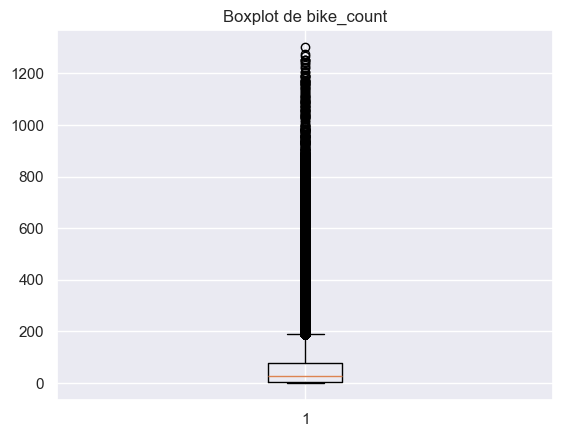

In [13]:
plt.boxplot(data["bike_count"])
plt.title("Boxplot de bike_count")
plt.show()

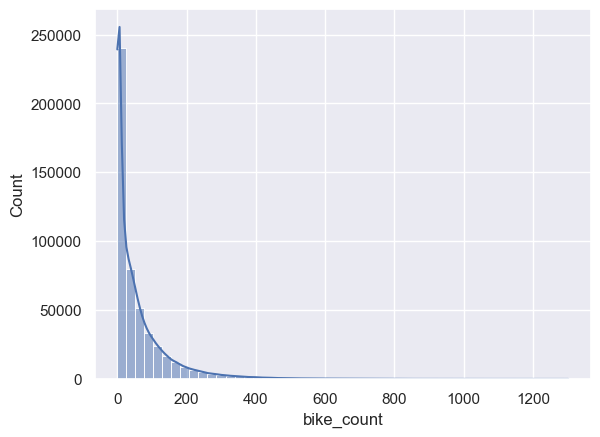

In [14]:
ax = sns.histplot(data, x="bike_count", kde=True, bins=50)

In [15]:
(data["bike_count"] > 400).sum() / len(data)

0.011116545598367238

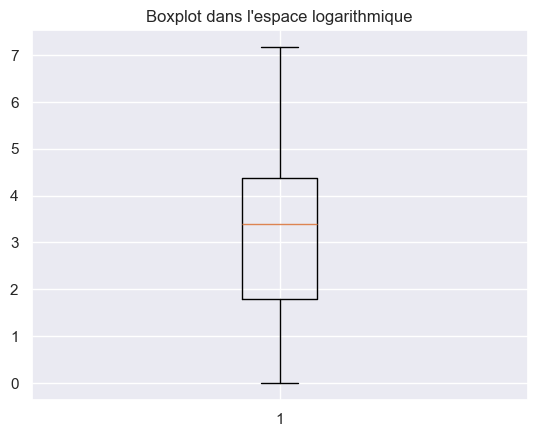

In [16]:
plt.boxplot(data["log_bike_count"])
plt.title("Boxplot dans l'espace logarithmique")
plt.show()

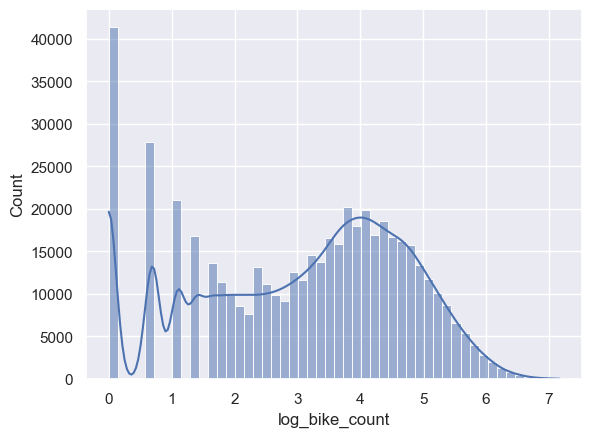

In [17]:
ax = sns.histplot(data, x="log_bike_count", kde=True, bins=50)

# Data Processing

### Process dates

In [18]:
def _encode_dates(X):
    X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X.loc[:, "year"] = X["date"].dt.year
    X.loc[:, "month"] = X["date"].dt.month
    X.loc[:, "week_number"] = X["date"].dt.isocalendar().week
    X.loc[:, "day"] = X["date"].dt.day
    X.loc[:, "weekday"] = X["date"].dt.weekday
    X.loc[:, "weekend?"] = X["date"].dt.weekday.isin([5, 6]).astype(int)
    X.loc[:, "hour"] = X["date"].dt.hour
    X.loc[:, "dayofyear"] = X["date"].dt.dayofyear  # Add the day of the year

    # Finally we can drop the original columns from the dataframe
    return X

In [19]:
def get_time_of_day(hour):
    if hour > 3 and hour <= 6:
        return 1
    if hour > 6 and hour <= 9:
        return 2
    elif hour > 9 and hour <= 12:
        return 3
    elif hour > 12 and hour <= 17:
        return 4
    elif hour > 17 and hour <= 22:
        return 5
    else:
        return 6

In [20]:
def get_season(date):
    if (date > datetime(2020, 9, 21)) & (date < datetime(2020, 12, 21)):
        return 1
    if (date > datetime(2020, 12, 20)) & (date < datetime(2021, 3, 20)):
        return 2
    if (date > datetime(2021, 3, 19)) & (date < datetime(2021, 6, 21)):
        return 3
    if ((date > datetime(2021, 6, 20)) & (date < datetime(2021, 9, 22))) | (
        (date > datetime(2020, 6, 19)) & (date < datetime(2020, 9, 22))
    ):
        return 4

In [21]:
data = pd.read_parquet(Path("data") / "train.parquet")
data = _encode_dates(data)
data["time_of_day"] = data["hour"].apply(get_time_of_day)
data["season"] = data["date"].apply(get_season)
data

counter_id                counter_name    site_id  \
48321   100007049-102007049    28 boulevard Diderot E-O  100007049   
48324   100007049-102007049    28 boulevard Diderot E-O  100007049   
48327   100007049-102007049    28 boulevard Diderot E-O  100007049   
48330   100007049-102007049    28 boulevard Diderot E-O  100007049   
48333   100007049-102007049    28 boulevard Diderot E-O  100007049   
...                     ...                         ...        ...   
929175  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929178  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929181  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929184  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929187  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   

                   site_name  bike_count                date  \
48321   28 boulevard Diderot         0.0 2020-09-01 02:00:00   
48324   28 boulevard Diderot         1.0 2020-09-01 03:00:00   
48327   28 boulevard Diderot         0.0 2020-09-01 04:00:00   
48330   28 boulevard Diderot         4.0 2020-09-01 15:00:00   
48333   28 boulevard Diderot         9.0 2020-09-01 18:00:00   
...                      ...         ...                 ...   
929175  254 rue de Vaugirard       445.0 2021-09-09 06:00:00   
929178  254 rue de Vaugirard       145.0 2021-09-09 10:00:00   
929181  254 rue de Vaugirard       218.0 2021-09-09 15:00:00   
929184  254 rue de Vaugirard        21.0 2021-09-09 22:00:00   
929187  254 rue de Vaugirard        15.0 2021-09-09 23:00:00   

       counter_installation_date         coordinates counter_technical_id  \
48321                 2013-01-18  48.846028,2.375429          Y2H15027244   
48324                 2013-01-18  48.846028,2.375429          Y2H15027244   
48327                 2013-01-18  48.846028,2.375429          Y2H15027244   
48330                 2013-01-18  48.846028,2.375429          Y2H15027244   
48333                 2013-01-18  48.846028,2.375429          Y2H15027244   
...                          ...                 ...                  ...   
929175                2020-11-29    48.83977,2.30198          Y2H20114504   
929178                2020-11-29    48.83977,2.30198          Y2H20114504   
929181                2020-11-29    48.83977,2.30198          Y2H20114504   
929184                2020-11-29    48.83977,2.30198          Y2H20114504   
929187                2020-11-29    48.83977,2.30198          Y2H20114504   

         latitude  ...  year  month  week_number  day  weekday  weekend?  \
48321   48.846028  ...  2020      9           36    1        1         0   
48324   48.846028  ...  2020      9           36    1        1         0   
48327   48.846028  ...  2020      9           36    1        1         0   
48330   48.846028  ...  2020      9           36    1        1         0   
48333   48.846028  ...  2020      9           36    1        1         0   
...           ...  ...   ...    ...          ...  ...      ...       ...   
929175  48.839770  ...  2021      9           36    9        3         0   
929178  48.839770  ...  2021      9           36    9        3         0   
929181  48.839770  ...  2021      9           36    9        3         0   
929184  48.839770  ...  2021      9           36    9        3         0   
929187  48.839770  ...  2021      9           36    9        3         0   

        hour  dayofyear  time_of_day  season  
48321      2        245            6       4  
48324      3        245            6       4  
48327      4        245            1       4  
48330     15        245            4       4  
48333     18        245            5       4  
...      ...        ...          ...     ...  
929175     6        252            1       4  
929178    10        252            3       4  
929181    15        252            4       4  
929184    22        252            5       4  
929187    23        252            6       4  

[496

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [23]:
data["date"].max(), data["date"].min()

(Timestamp('2021-09-09 23:00:00'), Timestamp('2020-09-01 01:00:00'))

In [24]:
data["site_id"] = data["site_id"].astype("category")  # Convert in category
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  category      
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

### Val = 0

In [25]:
data[data["bike_count"] == 0].groupby("hour").size()

hour
0     5712
1     7419
2     7423
3     5034
4     2111
5      948
6      530
7      365
8      330
9      303
10     301
11     309
12     287
13     305
14     284
15     274
16     273
17     298
18     352
19     498
20     752
21    1230
22    2339
23    3724
dtype: int64

In [26]:
data[data["bike_count"] == 0].groupby("counter_name").size()

/var/folders/8z/2_mhw76x0cl3ryfqpm55hst40000gn/T/ipykernel_8881/769004535.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[data["bike_count"] == 0].groupby("counter_name").size()


counter_name
152 boulevard du Montparnasse E-O                  1088
152 boulevard du Montparnasse O-E                  1153
18 quai de l'Hôtel de Ville NO-SE                   854
18 quai de l'Hôtel de Ville SE-NO                   645
20 Avenue de Clichy NO-SE                          2375
20 Avenue de Clichy SE-NO                          2354
254 rue de Vaugirard NE-SO                          510
254 rue de Vaugirard SO-NE                          278
27 quai de la Tournelle NO-SE                       379
27 quai de la Tournelle SE-NO                       181
28 boulevard Diderot E-O                           3068
28 boulevard Diderot O-E                            270
36 quai de Grenelle NE-SO                           328
36 quai de Grenelle SO-NE                           658
38 rue Turbigo NE-SO                                317
38 rue Turbigo SO-NE                                329
39 quai François Mauriac NO-SE                      423
39 quai François Mauriac SE-NO     

Test pour voir quels sont les jours où le compteur est cassé. 

/var/folders/8z/2_mhw76x0cl3ryfqpm55hst40000gn/T/ipykernel_8881/2876725952.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_data.groupby(["counter_name", "date_only"])["bike_count_is_zero"]


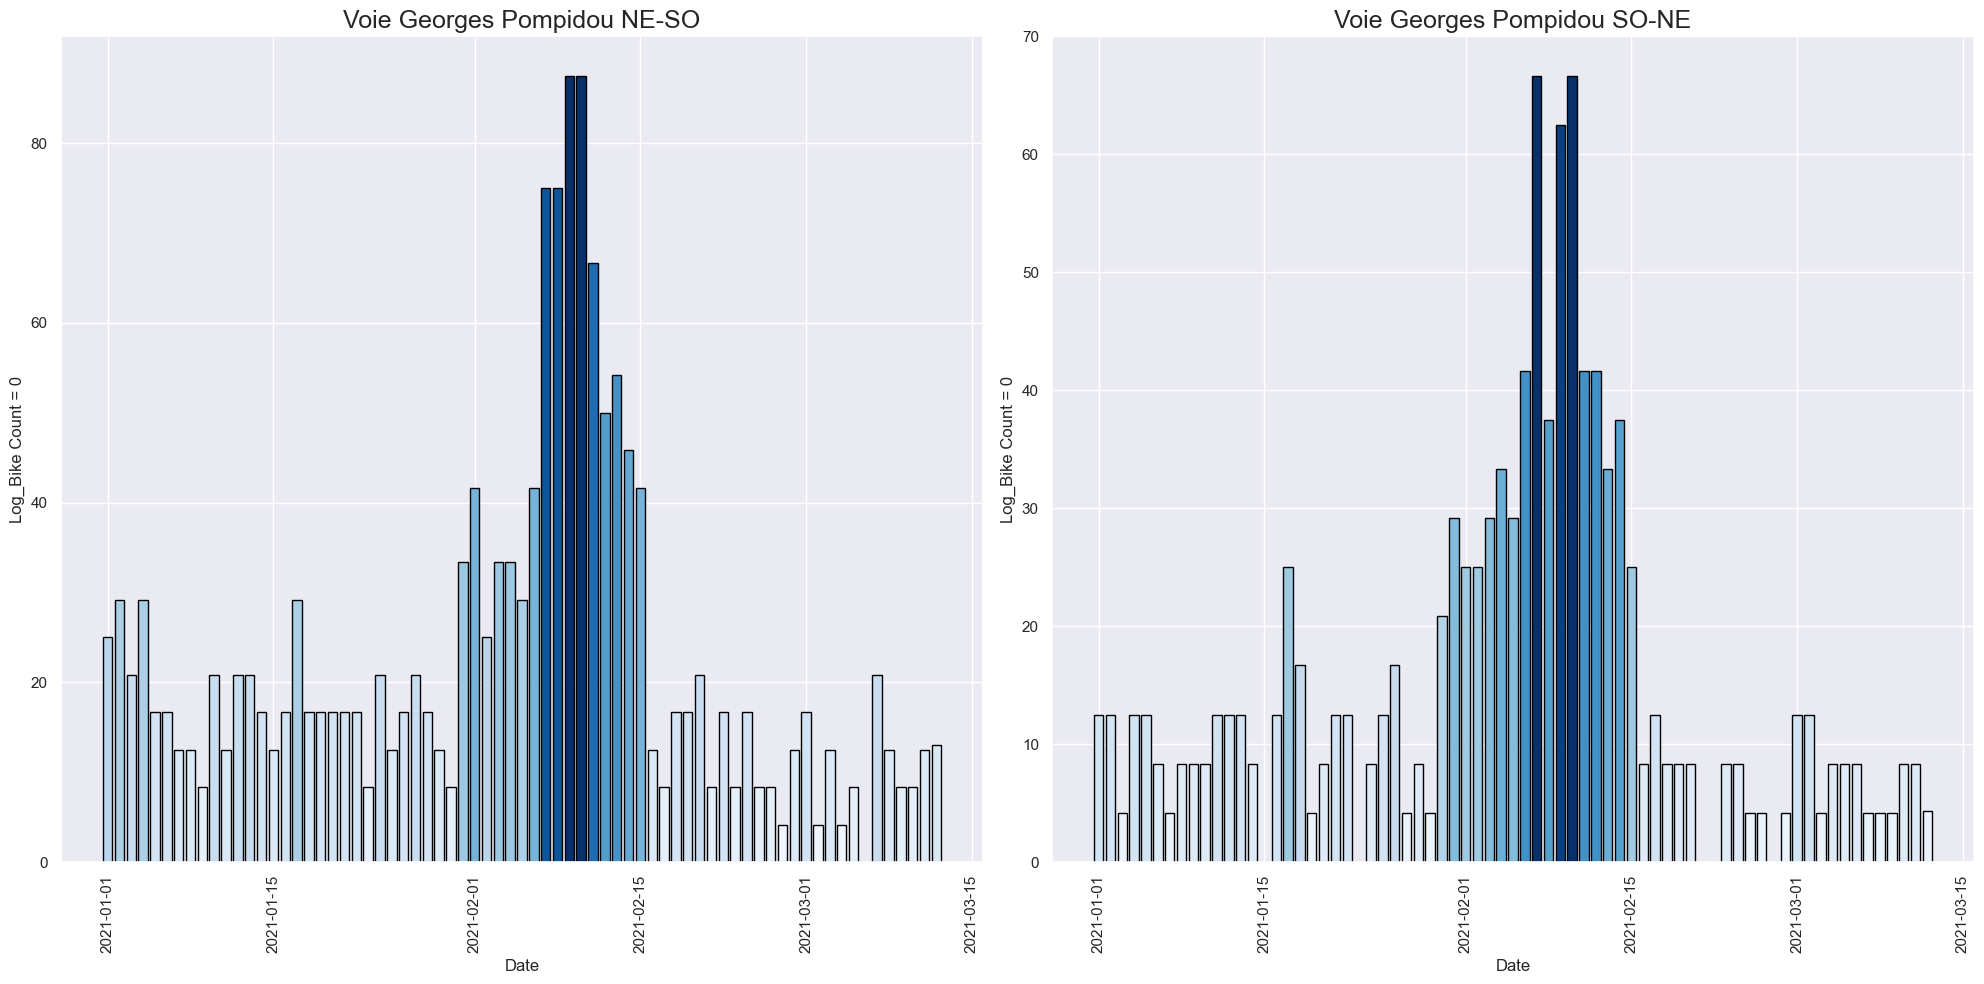

In [27]:
# Définir le range de dates (modifiez ces dates selon vos besoins)
starting_date = pd.Timestamp("2021-01-01").date()
ending_date = pd.Timestamp("2021-03-25").date()

new_data = data
# Calcul des données groupées
new_data["bike_count_is_zero"] = new_data["log_bike_count"] == 0
new_data["date_only"] = new_data[
    "date"
].dt.date  # Extraire uniquement la date sans l'heure

# **Filtrer les données dans le range spécifié**
new_data = new_data[
    (data["date_only"] >= starting_date) & (new_data["date_only"] <= ending_date)
]

# Regroupement par compteur et date
df_grouped = (
    new_data.groupby(["counter_name", "date_only"])["bike_count_is_zero"]
    .agg(["sum", "count"])
    .reset_index()
)
df_grouped["percentage_zero"] = df_grouped["sum"] / df_grouped["count"] * 100

# **Spécifier les counters à afficher**
selected_counters = [
    "Voie Georges Pompidou NE-SO",
    "Voie Georges Pompidou SO-NE",
]  # Modifie cette liste pour choisir les counters

# Filtrer les données pour les counters sélectionnés
df_grouped = df_grouped[df_grouped["counter_name"].isin(selected_counters)]

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(1, len(selected_counters), figsize=(20, 10))
if len(selected_counters) == 1:
    axes = [axes]  # S'assurer que `axes` est une liste si un seul counter est choisi

# Création des histogrammes pour chaque compteur
for i, counter in enumerate(selected_counters):
    counter_data = df_grouped[df_grouped["counter_name"] == counter]
    # Calcul du dégradé des couleurs
    normalized_values = (
        counter_data["percentage_zero"] / counter_data["percentage_zero"].max()
    )
    colors = cm.Blues(normalized_values)

    # Création des barres avec le dégradé
    axes[i].bar(
        counter_data["date_only"],
        counter_data["percentage_zero"],
        color=colors,
        edgecolor="black",
    )
    axes[i].set_title(f"{counter}", fontsize=18)
    axes[i].set_xlabel("Date")
    axes[i].tick_params(axis="x", rotation=90)  # Rotation des ticks pour la lisibilité
    axes[i].set_ylabel("Log_Bike Count = 0")

# Ajustement de l'espacement
plt.tight_layout()

# Affichage du graphique
plt.show()

**Les deux prochaines fonctions sont celles qu'il faut inclure dans data_engineering pour gérer les 3 stations qui ont des semaines à 100%**

In [28]:
def replace_bike_count(dataset, counter_names, start_date, end_date, target_months):
    """
    Remplace les valeurs de log_bike_count sur une période donnée par la moyenne des bike_count
    des mois spécifiés, en excluant la période cible.

    Parameters:
        dataset (pd.DataFrame): Le DataFrame contenant les données.
        counter_names (list): Les noms des compteurs à traiter.
        start_date (pd.Timestamp): Début de la période où les données doivent être remplacées.
        end_date (pd.Timestamp): Fin de la période où les données doivent être remplacées.
        target_months (list): Liste des mois (numéros) à utiliser pour calculer les moyennes.

    Returns:
        pd.DataFrame: Le DataFrame mis à jour avec les valeurs remplacées.
    """
    # Vérifier que des compteurs sont fournis
    if len(counter_names) < 1:
        raise ValueError(
            "Vous devez fournir au moins un compteur dans `counter_names`."
        )

    # Ajouter des colonnes utiles
    dataset["date_only"] = dataset["date"].dt.date
    dataset["month"] = dataset["date"].dt.month
    dataset["hour"] = dataset["date"].dt.hour

    for counter_name in counter_names:
        # Filtrer les données pour le compteur sélectionné
        data_filtered = dataset[dataset["counter_name"] == counter_name]

        # Exclure la période cible et filtrer pour les mois spécifiés
        seasonal_data = data_filtered[
            (
                (data_filtered["date_only"] < start_date)
                | (data_filtered["date_only"] > end_date)
            )
            & (data_filtered["month"].isin(target_months))
        ]

        # Calculer la moyenne des bike_count par heure pour les mois spécifiés
        mean_seasonal_per_hour = seasonal_data.groupby("hour")["log_bike_count"].mean()

        # Remplacer les valeurs de bike_count sur la période cible
        dataset.loc[
            (dataset["counter_name"] == counter_name)
            & (dataset["date_only"] >= start_date)
            & (dataset["date_only"] <= end_date),
            "log_bike_count",
        ] = dataset.loc[
            (dataset["counter_name"] == counter_name)
            & (dataset["date_only"] >= start_date)
            & (dataset["date_only"] <= end_date),
            "hour",
        ].map(
            mean_seasonal_per_hour
        )

    return dataset

In [29]:
def replace_broken_counters(dataset):
    dataset = replace_bike_count(
        dataset,
        ["20 Avenue de Clichy NO-SE", "20 Avenue de Clichy SE-NO"],
        start_date=pd.Timestamp("2021-04-09").date(),
        end_date=pd.Timestamp("2021-07-21").date(),
        target_months=np.arange(1, 13),
    )
    dataset = replace_bike_count(
        dataset,
        ["152 boulevard du Montparnasse O-E", "152 boulevard du Montparnasse E-O"],
        start_date=pd.Timestamp("2021-01-25").date(),
        end_date=pd.Timestamp("2021-02-24").date(),
        target_months=[11, 12, 1, 2, 3],
    )
    dataset = replace_bike_count(
        dataset,
        ["Voie Georges Pompidou NE-SO", "Voie Georges Pompidou SO-NE"],
        start_date=pd.Timestamp("2021-02-01").date(),
        end_date=pd.Timestamp("2021-02-15").date(),
        target_months=[1, 2],
    )
    return dataset

In [30]:
data = replace_broken_counters(data)
data

counter_id                counter_name    site_id  \
48321   100007049-102007049    28 boulevard Diderot E-O  100007049   
48324   100007049-102007049    28 boulevard Diderot E-O  100007049   
48327   100007049-102007049    28 boulevard Diderot E-O  100007049   
48330   100007049-102007049    28 boulevard Diderot E-O  100007049   
48333   100007049-102007049    28 boulevard Diderot E-O  100007049   
...                     ...                         ...        ...   
929175  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929178  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929181  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929184  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929187  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   

                   site_name  bike_count                date  \
48321   28 boulevard Diderot         0.0 2020-09-01 02:00:00   
48324   28 boulevard Diderot         1.0 2020-09-01 03:00:00   
48327   28 boulevard Diderot         0.0 2020-09-01 04:00:00   
48330   28 boulevard Diderot         4.0 2020-09-01 15:00:00   
48333   28 boulevard Diderot         9.0 2020-09-01 18:00:00   
...                      ...         ...                 ...   
929175  254 rue de Vaugirard       445.0 2021-09-09 06:00:00   
929178  254 rue de Vaugirard       145.0 2021-09-09 10:00:00   
929181  254 rue de Vaugirard       218.0 2021-09-09 15:00:00   
929184  254 rue de Vaugirard        21.0 2021-09-09 22:00:00   
929187  254 rue de Vaugirard        15.0 2021-09-09 23:00:00   

       counter_installation_date         coordinates counter_technical_id  \
48321                 2013-01-18  48.846028,2.375429          Y2H15027244   
48324                 2013-01-18  48.846028,2.375429          Y2H15027244   
48327                 2013-01-18  48.846028,2.375429          Y2H15027244   
48330                 2013-01-18  48.846028,2.375429          Y2H15027244   
48333                 2013-01-18  48.846028,2.375429          Y2H15027244   
...                          ...                 ...                  ...   
929175                2020-11-29    48.83977,2.30198          Y2H20114504   
929178                2020-11-29    48.83977,2.30198          Y2H20114504   
929181                2020-11-29    48.83977,2.30198          Y2H20114504   
929184                2020-11-29    48.83977,2.30198          Y2H20114504   
929187                2020-11-29    48.83977,2.30198          Y2H20114504   

         latitude  ...  week_number  day  weekday  weekend?  hour  dayofyear  \
48321   48.846028  ...           36    1        1         0     2        245   
48324   48.846028  ...           36    1        1         0     3        245   
48327   48.846028  ...           36    1        1         0     4        245   
48330   48.846028  ...           36    1        1         0    15        245   
48333   48.846028  ...           36    1        1         0    18        245   
...           ...  ...          ...  ...      ...       ...   ...        ...   
929175  48.839770  ...           36    9        3         0     6        252   
929178  48.839770  ...           36    9        3         0    10        252   
929181  48.839770  ...           36    9        3         0    15        252   
929184  48.839770  ...           36    9        3         0    22        252   
929187  48.839770  ...           36    9        3         0    23        252   

        time_of_day  season  bike_count_is_zero   date_only  
48321             6       4                True  2020-09-01  
48324             6       4               False  2020-09-01  
48327             1       4                True  2020-09-01  
48330             4       4               False  2020-09-01  
48333             5       4               False  2020-09-01  
...             ...     ...                 ...         ...  
929175            1       4               False  2021-09-09  
929178            3      

**Désormais, étudions la station Diderot, en faisant une interpolation**

/var/folders/8z/2_mhw76x0cl3ryfqpm55hst40000gn/T/ipykernel_8881/4126360215.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_data.groupby(["counter_name", "date_only"])["bike_count_is_zero"]


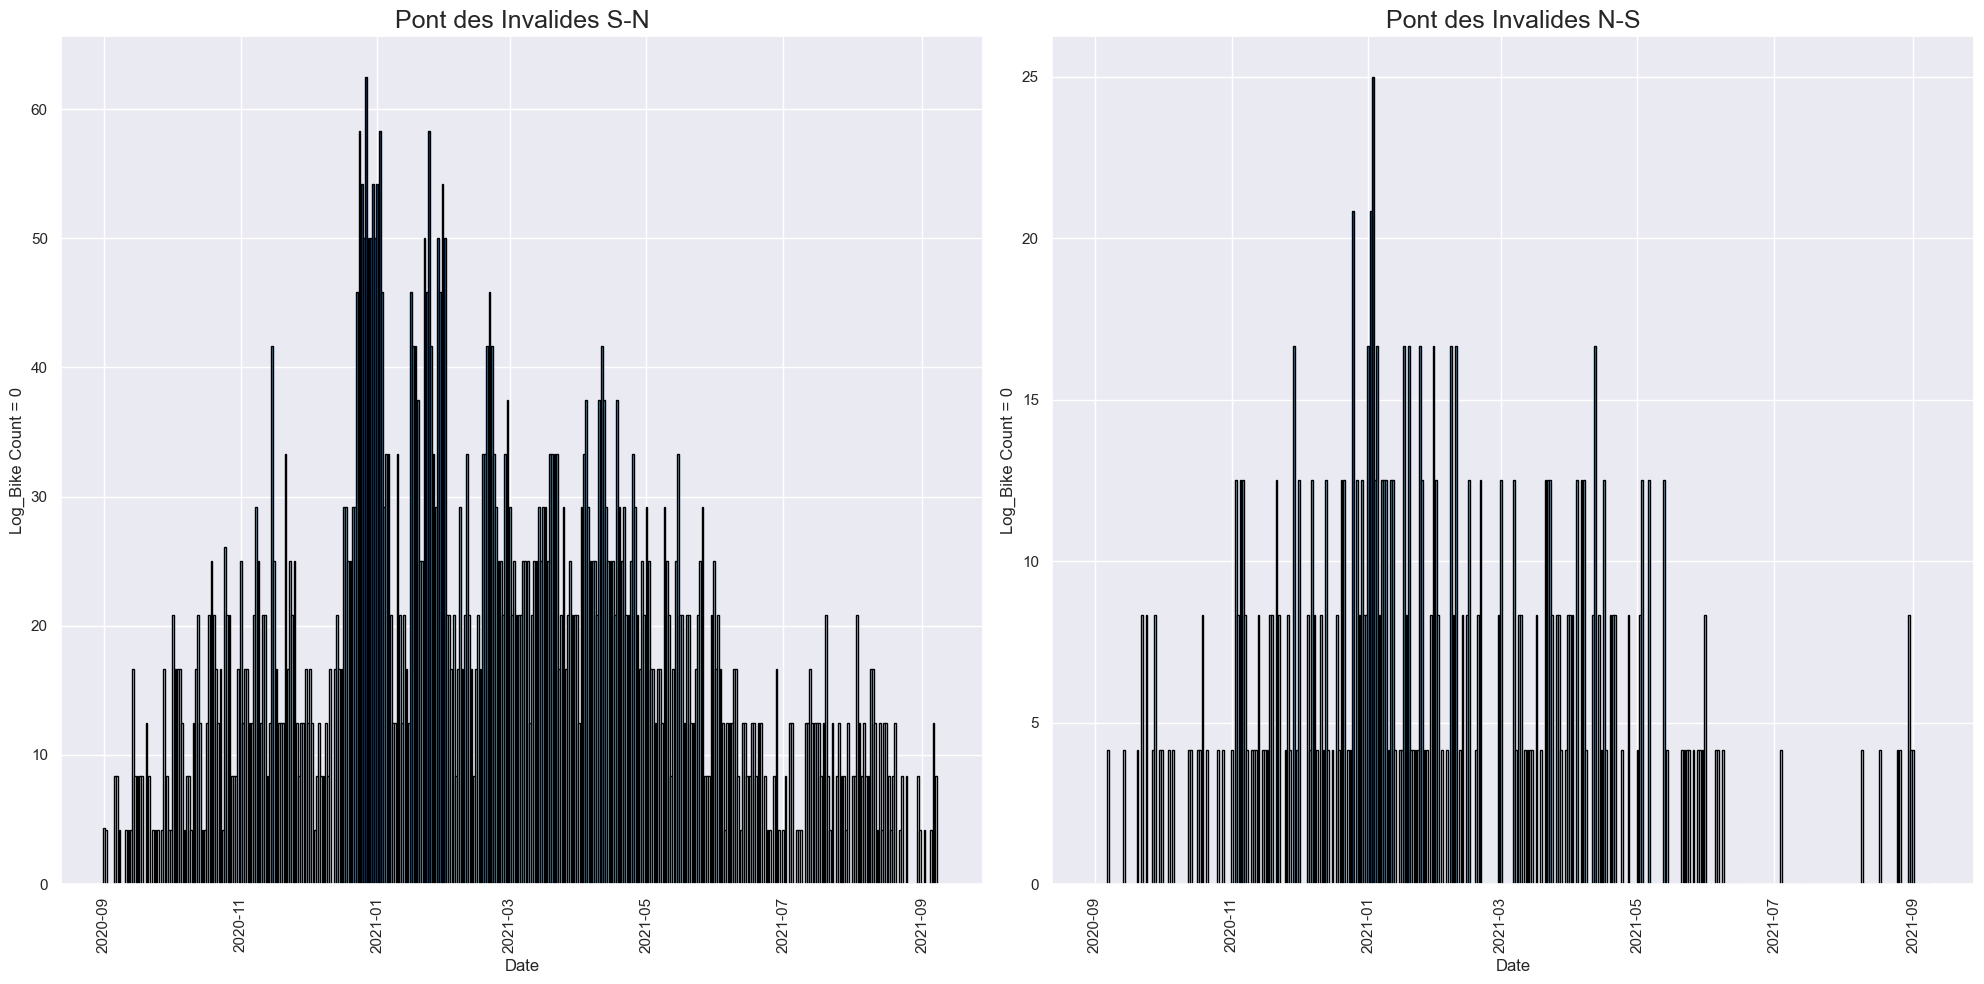

In [31]:
# Définir le range de dates (modifiez ces dates selon vos besoins)
starting_date = pd.Timestamp("2020-09-01").date()
ending_date = pd.Timestamp("2021-09-30").date()

new_data = data
# Calcul des données groupées
new_data["bike_count_is_zero"] = new_data["log_bike_count"] == 0
new_data["date_only"] = new_data[
    "date"
].dt.date  # Extraire uniquement la date sans l'heure

# **Filtrer les données dans le range spécifié**
new_data = new_data[
    (data["date_only"] >= starting_date) & (new_data["date_only"] <= ending_date)
]

# Regroupement par compteur et date
df_grouped = (
    new_data.groupby(["counter_name", "date_only"])["bike_count_is_zero"]
    .agg(["sum", "count"])
    .reset_index()
)
df_grouped["percentage_zero"] = df_grouped["sum"] / df_grouped["count"] * 100

# **Spécifier les counters à afficher**
selected_counters = [
    "Pont des Invalides S-N",
    "Pont des Invalides N-S",
]  # Modifie cette liste pour choisir les counters

# Filtrer les données pour les counters sélectionnés
df_grouped = df_grouped[df_grouped["counter_name"].isin(selected_counters)]

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(1, len(selected_counters), figsize=(20, 10))
if len(selected_counters) == 1:
    axes = [axes]  # S'assurer que `axes` est une liste si un seul counter est choisi

# Création des histogrammes pour chaque compteur
for i, counter in enumerate(selected_counters):
    counter_data = df_grouped[df_grouped["counter_name"] == counter]
    # Calcul du dégradé des couleurs
    normalized_values = (
        counter_data["percentage_zero"] / counter_data["percentage_zero"].max()
    )
    colors = cm.Blues(normalized_values)

    # Création des barres avec le dégradé
    axes[i].bar(
        counter_data["date_only"],
        counter_data["percentage_zero"],
        color=colors,
        edgecolor="black",
    )
    axes[i].set_title(f"{counter}", fontsize=18)
    axes[i].set_xlabel("Date")
    axes[i].tick_params(axis="x", rotation=90)  # Rotation des ticks pour la lisibilité
    axes[i].set_ylabel("Log_Bike Count = 0")

# Ajustement de l'espacement
plt.tight_layout()

# Affichage du graphique
plt.show()

/var/folders/8z/2_mhw76x0cl3ryfqpm55hst40000gn/T/ipykernel_8881/2724138981.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_data.groupby(["counter_name", "date_only"])["bike_count"].mean().reset_index()


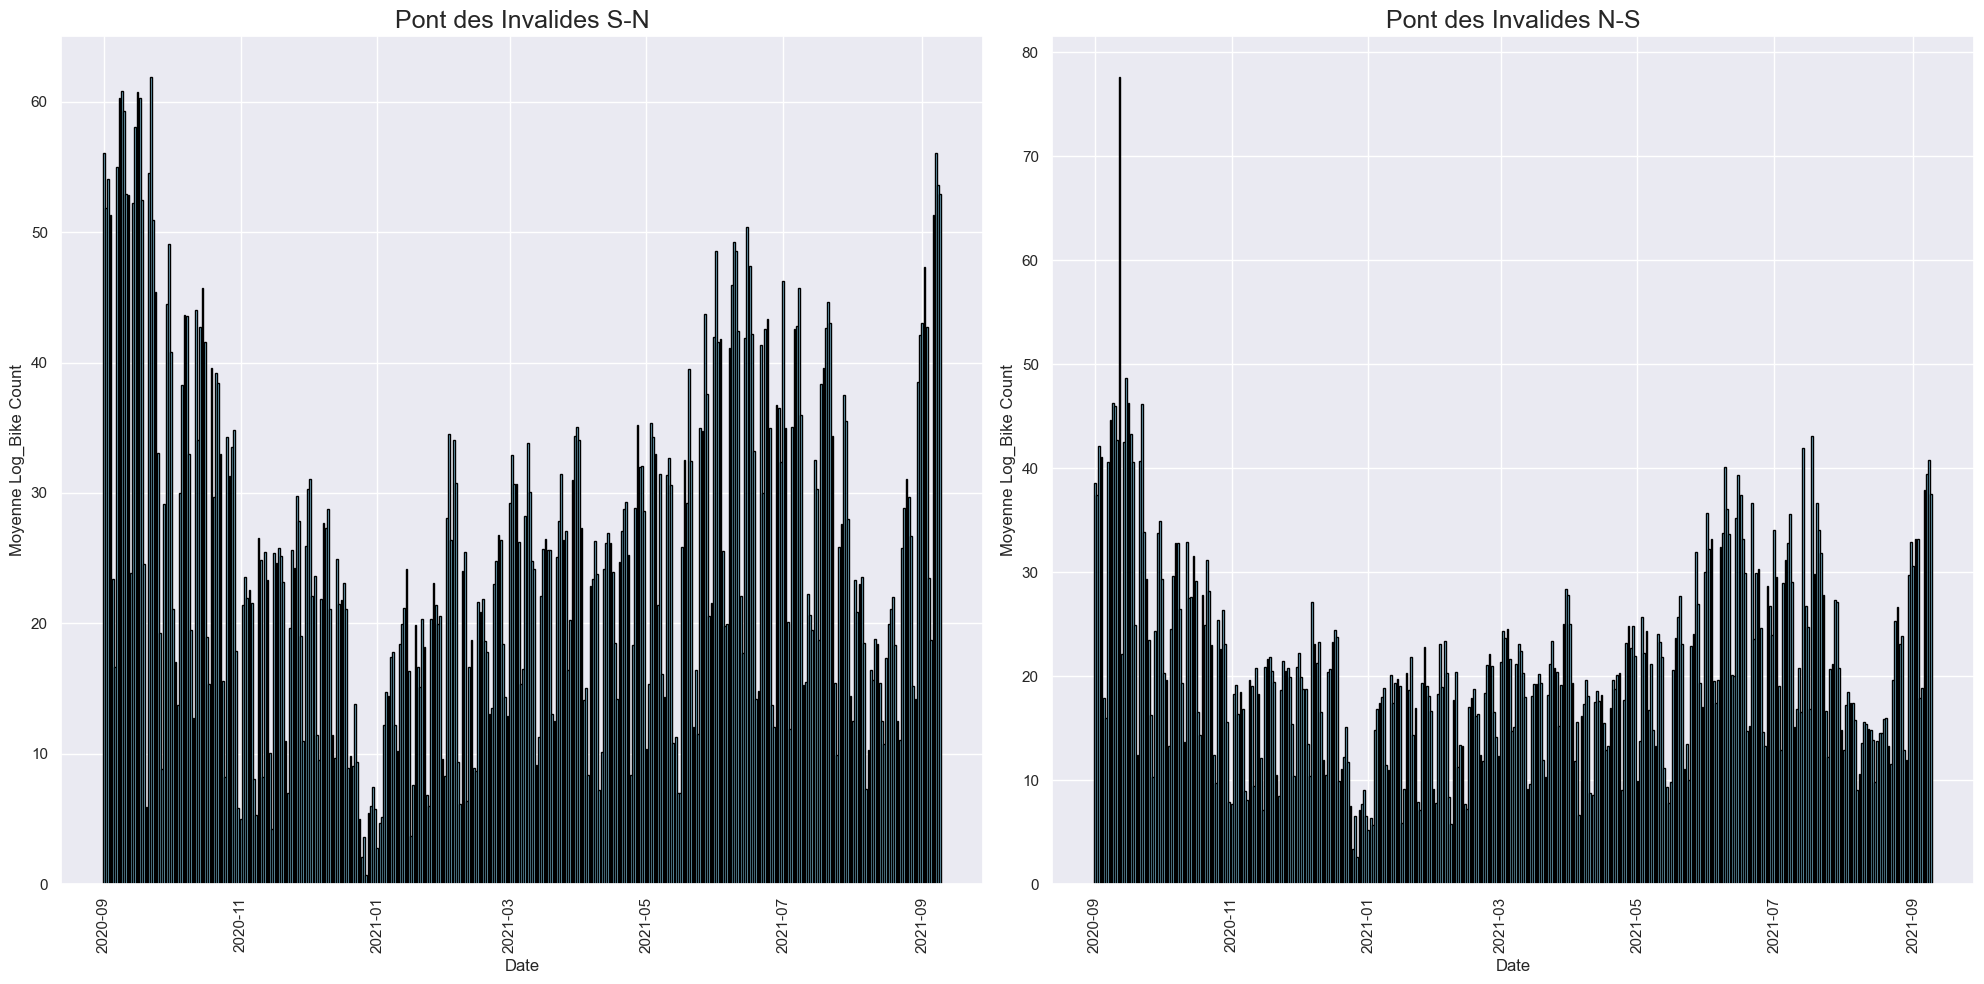

In [32]:
# Définir le range de dates (modifiez ces dates selon vos besoins)
starting_date = pd.Timestamp("2020-09-01").date()
ending_date = pd.Timestamp("2021-09-30").date()

new_data = data.copy()
new_data["date_only"] = new_data[
    "date"
].dt.date  # Extraire uniquement la date sans l'heure

# Filtrer les données dans le range spécifié
new_data = new_data[
    (new_data["date_only"] >= starting_date) & (new_data["date_only"] <= ending_date)
]

# Regroupement par compteur et date pour calculer la moyenne
df_grouped = (
    new_data.groupby(["counter_name", "date_only"])["bike_count"].mean().reset_index()
)

# Spécifier les counters à afficher
selected_counters = [
    "Pont des Invalides S-N",
    "Pont des Invalides N-S",
]  # Modifiez cette liste pour choisir les counters

# Filtrer les données pour les counters sélectionnés
df_grouped = df_grouped[df_grouped["counter_name"].isin(selected_counters)]

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(1, len(selected_counters), figsize=(20, 10))
if len(selected_counters) == 1:
    axes = [axes]  # S'assurer que `axes` est une liste si un seul counter est choisi

# Création des histogrammes pour chaque compteur
for i, counter in enumerate(selected_counters):
    counter_data = df_grouped[df_grouped["counter_name"] == counter]

    # Création des barres pour la moyenne journalière
    axes[i].bar(
        counter_data["date_only"],
        counter_data["bike_count"],
        color="skyblue",
        edgecolor="black",
    )
    axes[i].set_title(f"{counter}", fontsize=18)
    axes[i].set_xlabel("Date")
    axes[i].tick_params(axis="x", rotation=90)  # Rotation des ticks pour la lisibilité
    axes[i].set_ylabel("Moyenne Log_Bike Count")

# Ajustement de l'espacement
plt.tight_layout()

# Affichage du graphique
plt.show()

La différence est flagrante le 2021-02-07 60% vs 8%.

/var/folders/8z/2_mhw76x0cl3ryfqpm55hst40000gn/T/ipykernel_8881/4251908173.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["date_only"] = data_filtered[
/var/folders/8z/2_mhw76x0cl3ryfqpm55hst40000gn/T/ipykernel_8881/4251908173.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_zero_bike.groupby(["hour", "counter_name"]).size().unstack(fill_value=0)


                counter_id              counter_name    site_id  \
61694  100007049-101007049  28 boulevard Diderot O-E  100007049   
61697  100007049-101007049  28 boulevard Diderot O-E  100007049   
61700  100007049-101007049  28 boulevard Diderot O-E  100007049   
61703  100007049-101007049  28 boulevard Diderot O-E  100007049   
61706  100007049-101007049  28 boulevard Diderot O-E  100007049   
61709  100007049-101007049  28 boulevard Diderot O-E  100007049   
61887  100007049-101007049  28 boulevard Diderot O-E  100007049   
61890  100007049-101007049  28 boulevard Diderot O-E  100007049   
61893  100007049-101007049  28 boulevard Diderot O-E  100007049   
61896  100007049-101007049  28 boulevard Diderot O-E  100007049   
61899  100007049-101007049  28 boulevard Diderot O-E  100007049   
61902  100007049-101007049  28 boulevard Diderot O-E  100007049   
61905  100007049-101007049  28 boulevard Diderot O-E  100007049   
61908  100007049-101007049  28 boulevard Diderot O-E  10000704

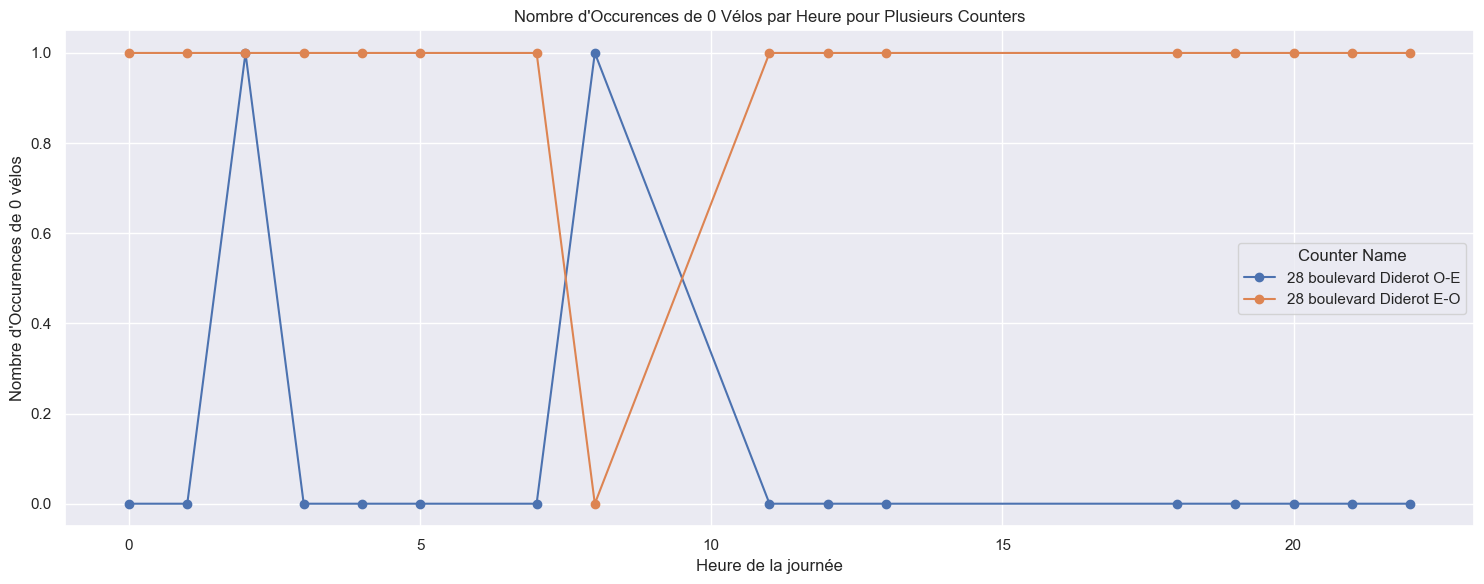

In [33]:
counters = [
    "28 boulevard Diderot O-E",
    "28 boulevard Diderot E-O",
]  # Remplacez par les noms réels des counters

jour_precis = pd.Timestamp("2021-02-07").date()

# Filtrer les données pour les counters sélectionnés
data_filtered = data[data["counter_name"].isin(counters)]

data_filtered["date_only"] = data_filtered[
    "date"
].dt.date  # Extraire uniquement la date sans l'heure

data_filtered = data_filtered[(data_filtered["date_only"] == jour_precis)]

print(
    pd.DataFrame(
        data_filtered[(data_filtered["counter_name"] == "28 boulevard Diderot O-E")]
    )
)
# print(pd.DataFrame(data_filtered[(data_filtered["counter_name"] == "28 boulevard Diderot O-E")]))

# Filtrer pour bike_count == 0
data_zero_bike = data_filtered[data_filtered["log_bike_count"] == 0]

# Grouper par hour et counter_name, puis compter les occurrences
counters_per_hour = (
    data_zero_bike.groupby(["hour", "counter_name"]).size().unstack(fill_value=0)
)
# Créer une figure pour afficher les données
plt.figure(figsize=(15, 6))

# Tracer les données pour chaque counter
for counter in counters:
    plt.plot(
        counters_per_hour.index, counters_per_hour[counter], marker="o", label=counter
    )

# Ajouter un titre et des labels
plt.title("Nombre d'Occurences de 0 Vélos par Heure pour Plusieurs Counters")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre d'Occurences de 0 vélos")
plt.grid(True)

# Ajouter une légende
plt.legend(title="Counter Name")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

**On remarque bien qu'un counter ne fonctionne pas, puisqu'il a presque toujours des 0 quand l'autre est en permanence utilisé.**

**Donne le % de 0 par semaine sur tous les counters, ça permet de vérifier que tout est ok après avoir fait les modifs**

/var/folders/8z/2_mhw76x0cl3ryfqpm55hst40000gn/T/ipykernel_8881/1891283854.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["counter_name", "year", "week"])["bike_count_is_zero"]


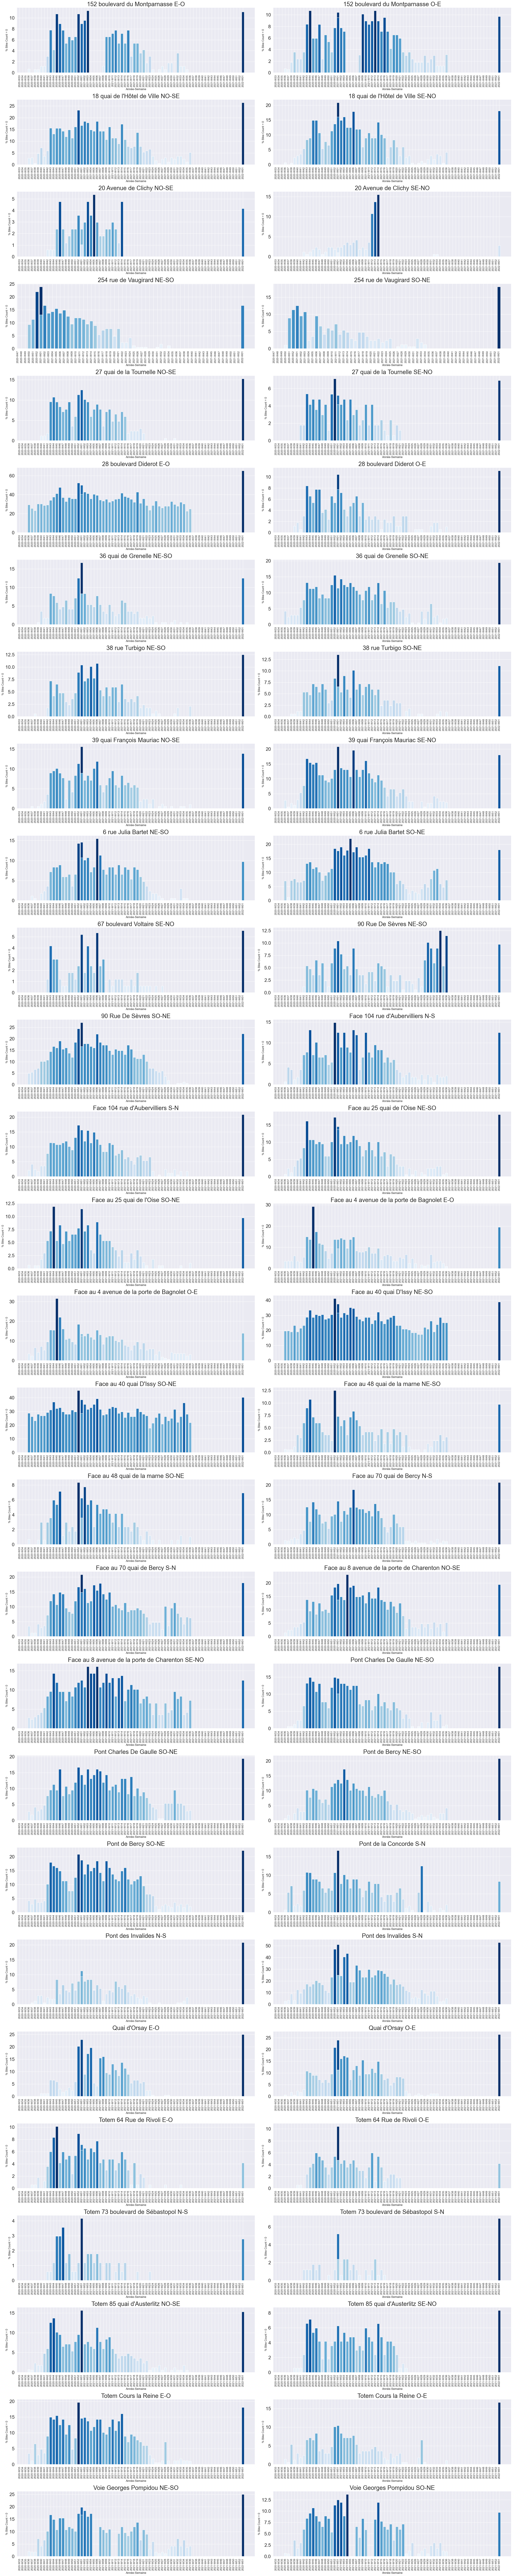

In [34]:
# Ajout des colonnes "year" et "year_week"
data["bike_count_is_zero"] = data["log_bike_count"] == 0
data["week"] = data["date"].dt.isocalendar().week
data["year_week"] = data["year"].astype(str) + "-W" + data["week"].astype(str)

# Calcul des données groupées par "counter_name" et "year_week"
df_grouped = (
    data.groupby(["counter_name", "year", "week"])["bike_count_is_zero"]
    .agg(["sum", "count"])
    .reset_index()
)
df_grouped["percentage_zero"] = df_grouped["sum"] / df_grouped["count"] * 100

# Créer une clé pour tri chronologique
df_grouped["year_week"] = pd.to_datetime(
    df_grouped["year"].astype(str) + "-" + df_grouped["week"].astype(str) + "-1",
    format="%Y-%W-%w",
)

# Trier les données par ordre chronologique
df_grouped = df_grouped.sort_values(by=["year_week"])

# Obtention de la liste des différents counters et tri alphabétique
counters = sorted(df_grouped["counter_name"].unique())  # Tri alphabétique des counters

# Calcul du nombre de lignes et de colonnes pour la grille de sous-graphiques
n_counters = len(counters)
n_cols = 2  # Nombre de colonnes (2 graphiques par ligne)
n_rows = (n_counters + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaires

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 150))
axes = axes.flatten()  # Aplatir le tableau des axes pour faciliter l'indexation

# Création des histogrammes pour chaque compteur dans l'ordre alphabétique
for i, counter in enumerate(counters):
    counter_data = df_grouped[df_grouped["counter_name"] == counter]
    colors = cm.Blues(
        counter_data["percentage_zero"] / counter_data["percentage_zero"].max()
    )

    axes[i].bar(
        counter_data["year_week"].dt.strftime(
            "%Y-W%U"
        ),  # Affichage lisible des semaines
        counter_data["percentage_zero"],
        color=colors,
    )
    axes[i].set_title(f"{counter}", fontsize=25)
    axes[i].set_xlabel("Année-Semaine")
    axes[i].set_ylabel("% Bike Count = 0")
    axes[i].tick_params(axis="x", rotation=90)  # Rotation pour lisibilité des semaines
    axes[i].tick_params(axis="y", labelsize=20)

# Suppression des sous-graphiques inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustement de l'espacement
plt.tight_layout()

# Affichage du graphique
plt.show()

In [35]:
STOP

NameError: name 'STOP' is not defined

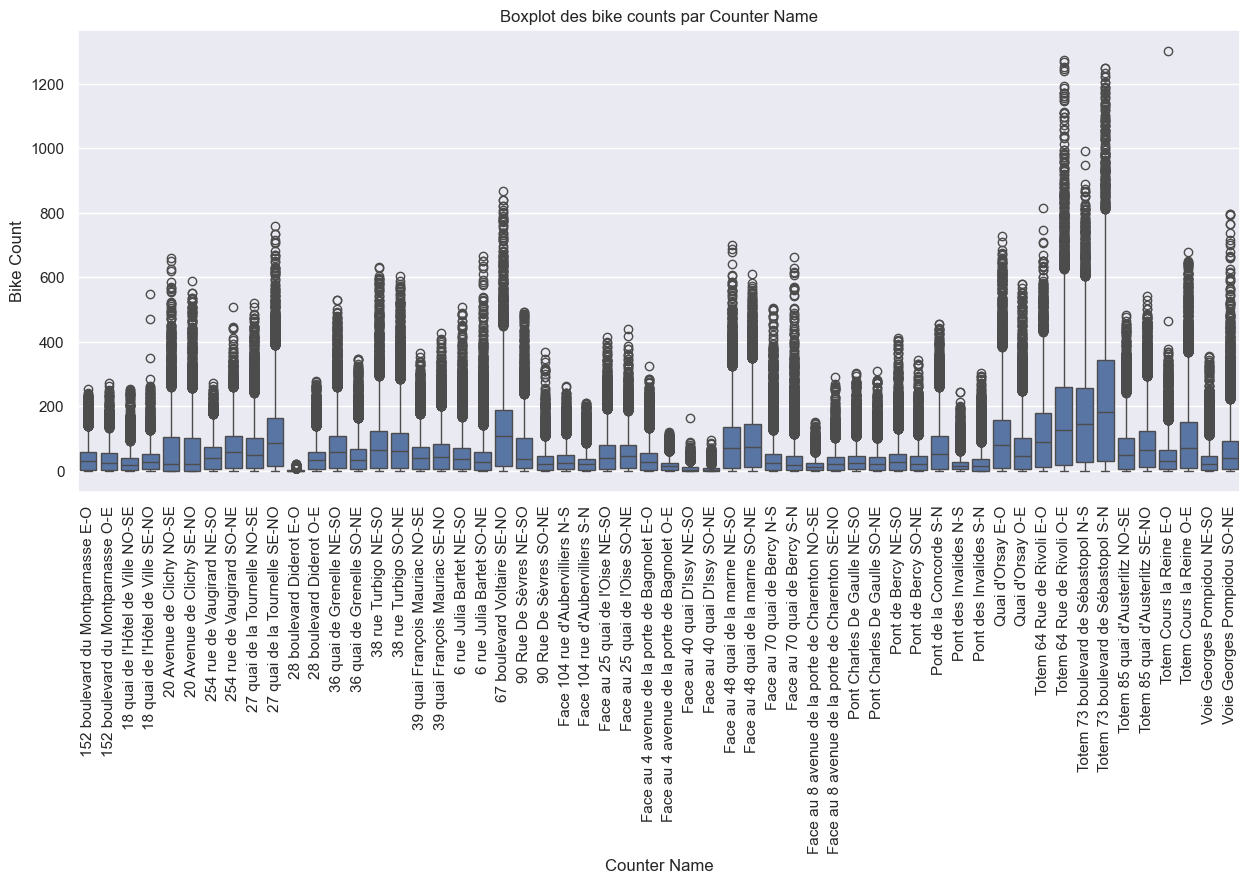

In [ ]:
plt.figure(figsize=(15, 6))  # Taille de la figure
sns.boxplot(x="counter_name", y="bike_count", data=data)
plt.xticks(
    rotation=90
)  # Si les noms des compteurs sont longs, cela les fera pivoter pour une meilleure lisibilité
plt.title("Boxplot des bike counts par Counter Name")
plt.xlabel("Counter Name")
plt.ylabel("Bike Count")
plt.show()

C:\Users\comem\AppData\Local\Temp\ipykernel_7216\2555938990.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = data.groupby(["counter_name", "hour"])["bike_count"].mean().reset_index()
C:\Users\comem\AppData\Local\Temp\ipykernel_7216\2555938990.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


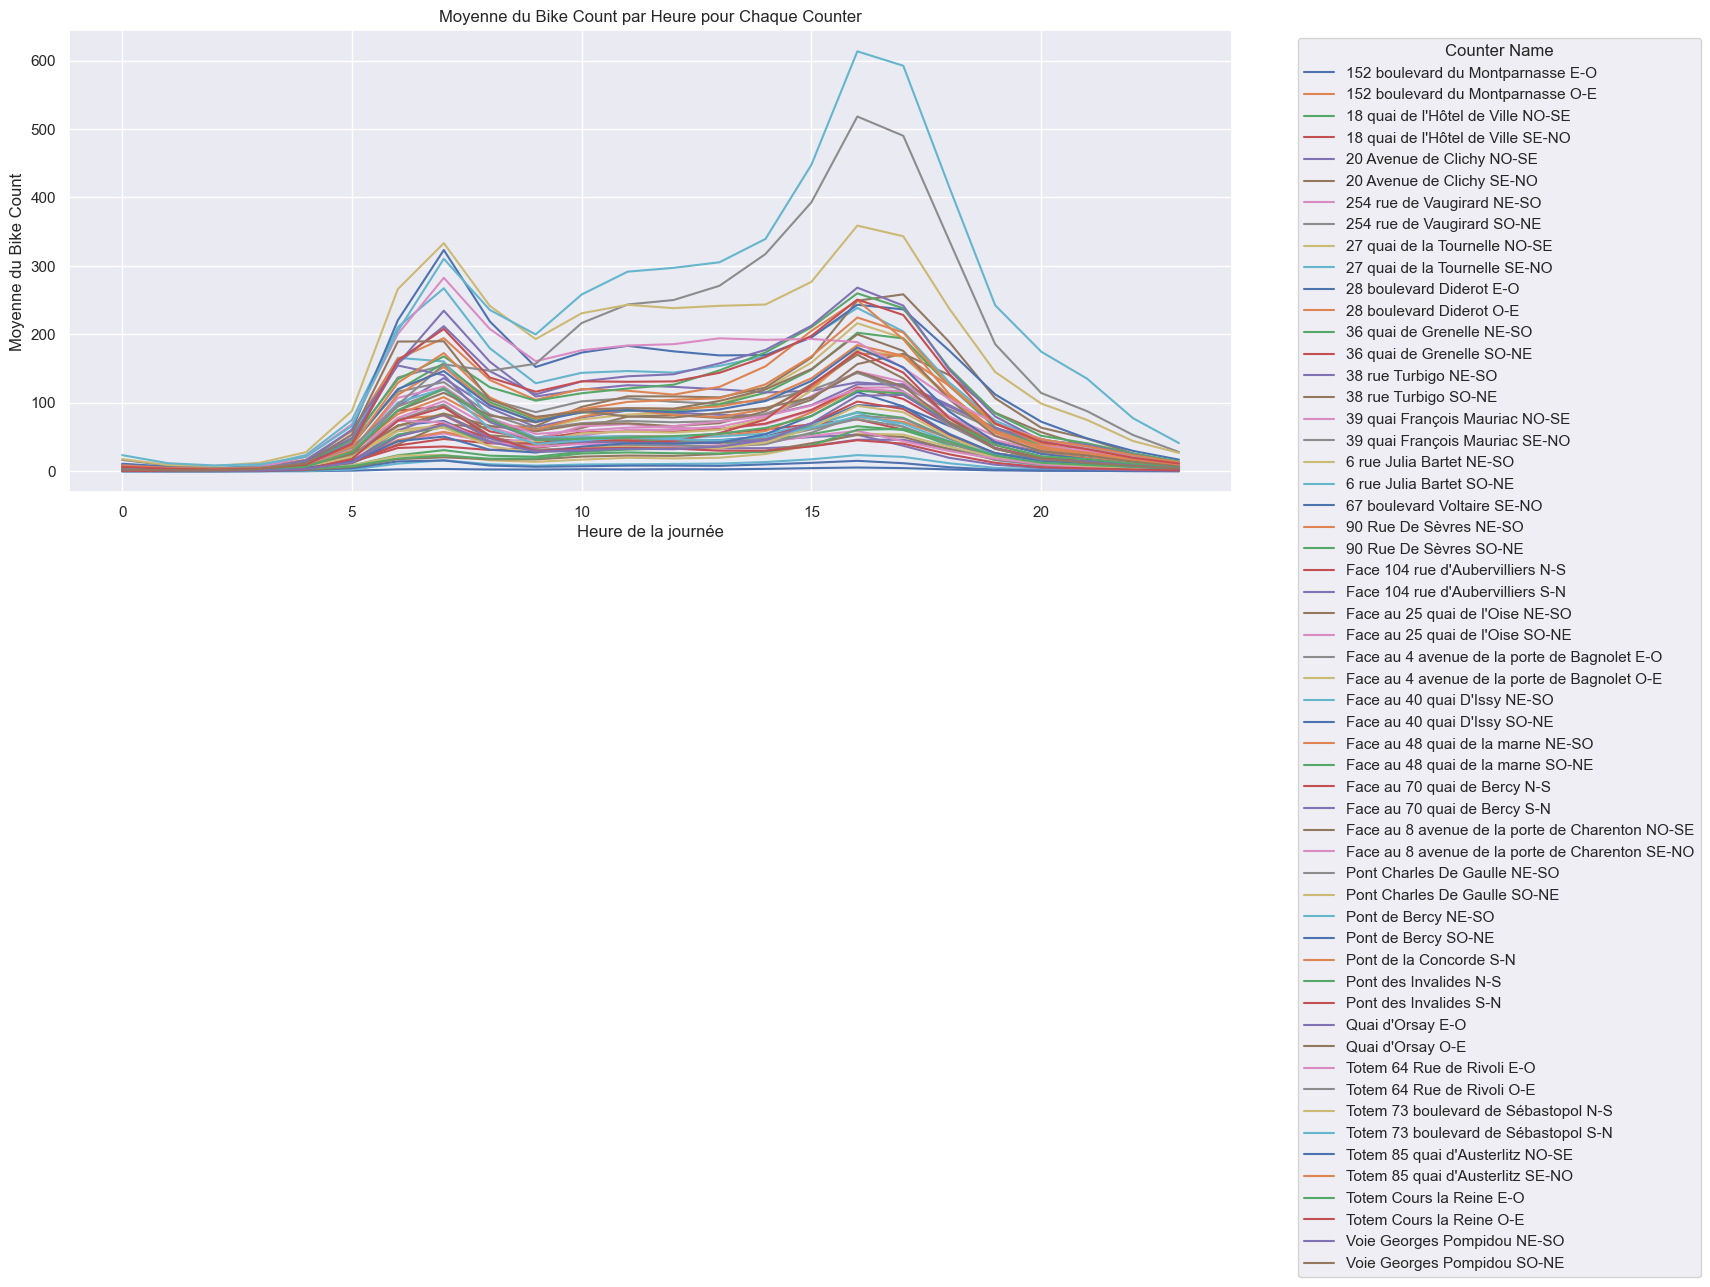

In [ ]:
df_grouped = data.groupby(["counter_name", "hour"])["bike_count"].mean().reset_index()

plt.figure(figsize=(15, 6))
for counter in df_grouped["counter_name"].unique():
    counter_data = df_grouped[df_grouped["counter_name"] == counter]
    plt.plot(counter_data["hour"], counter_data["bike_count"], label=counter)

plt.title("Moyenne du Bike Count par Heure pour Chaque Counter")
plt.xlabel("Heure de la journée")
plt.ylabel("Moyenne du Bike Count")
plt.legend(title="Counter Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.tight_layout()
plt.show()

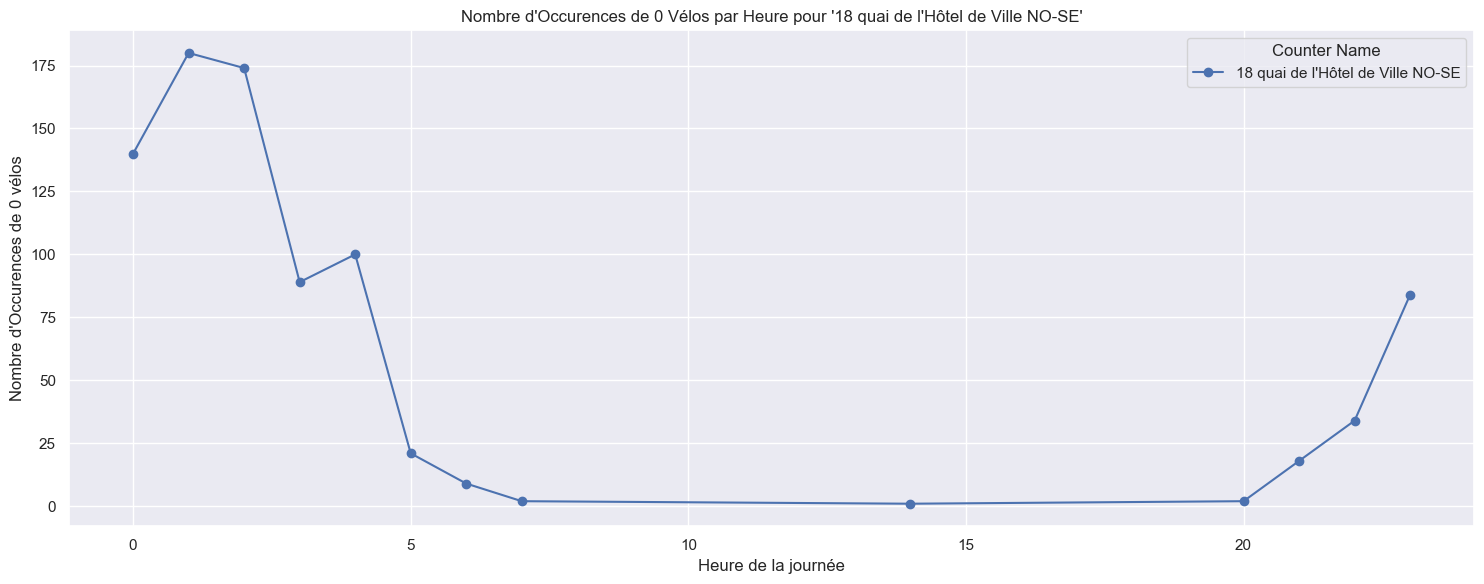

In [ ]:
selected_counter = (
    "18 quai de l'Hôtel de Ville NO-SE"  # Remplacez par le nom réel du counter
)
data_counter = data[data["counter_name"] == selected_counter]

# Filtrer pour bike_count == 0
data_zero_bike = data_counter[data_counter["bike_count"] == 0]

# Grouper par heure et compter les occurrences
counters_per_hour = data_zero_bike.groupby("hour").size()

# Créer une figure pour afficher les données
plt.figure(figsize=(15, 6))

plt.plot(
    counters_per_hour.index,
    counters_per_hour.values,
    marker="o",
    label=selected_counter,
)

plt.title(f"Nombre d'Occurences de 0 Vélos par Heure pour '{selected_counter}'")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre d'Occurences de 0 vélos")
plt.grid(True)

# Ajouter une légende
plt.legend(title="Counter Name")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

C:\Users\comem\AppData\Local\Temp\ipykernel_7216\650772691.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["counter_name", "hour"])["bike_count_is_zero"]
C:\Users\comem\AppData\Local\Temp\ipykernel_7216\650772691.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


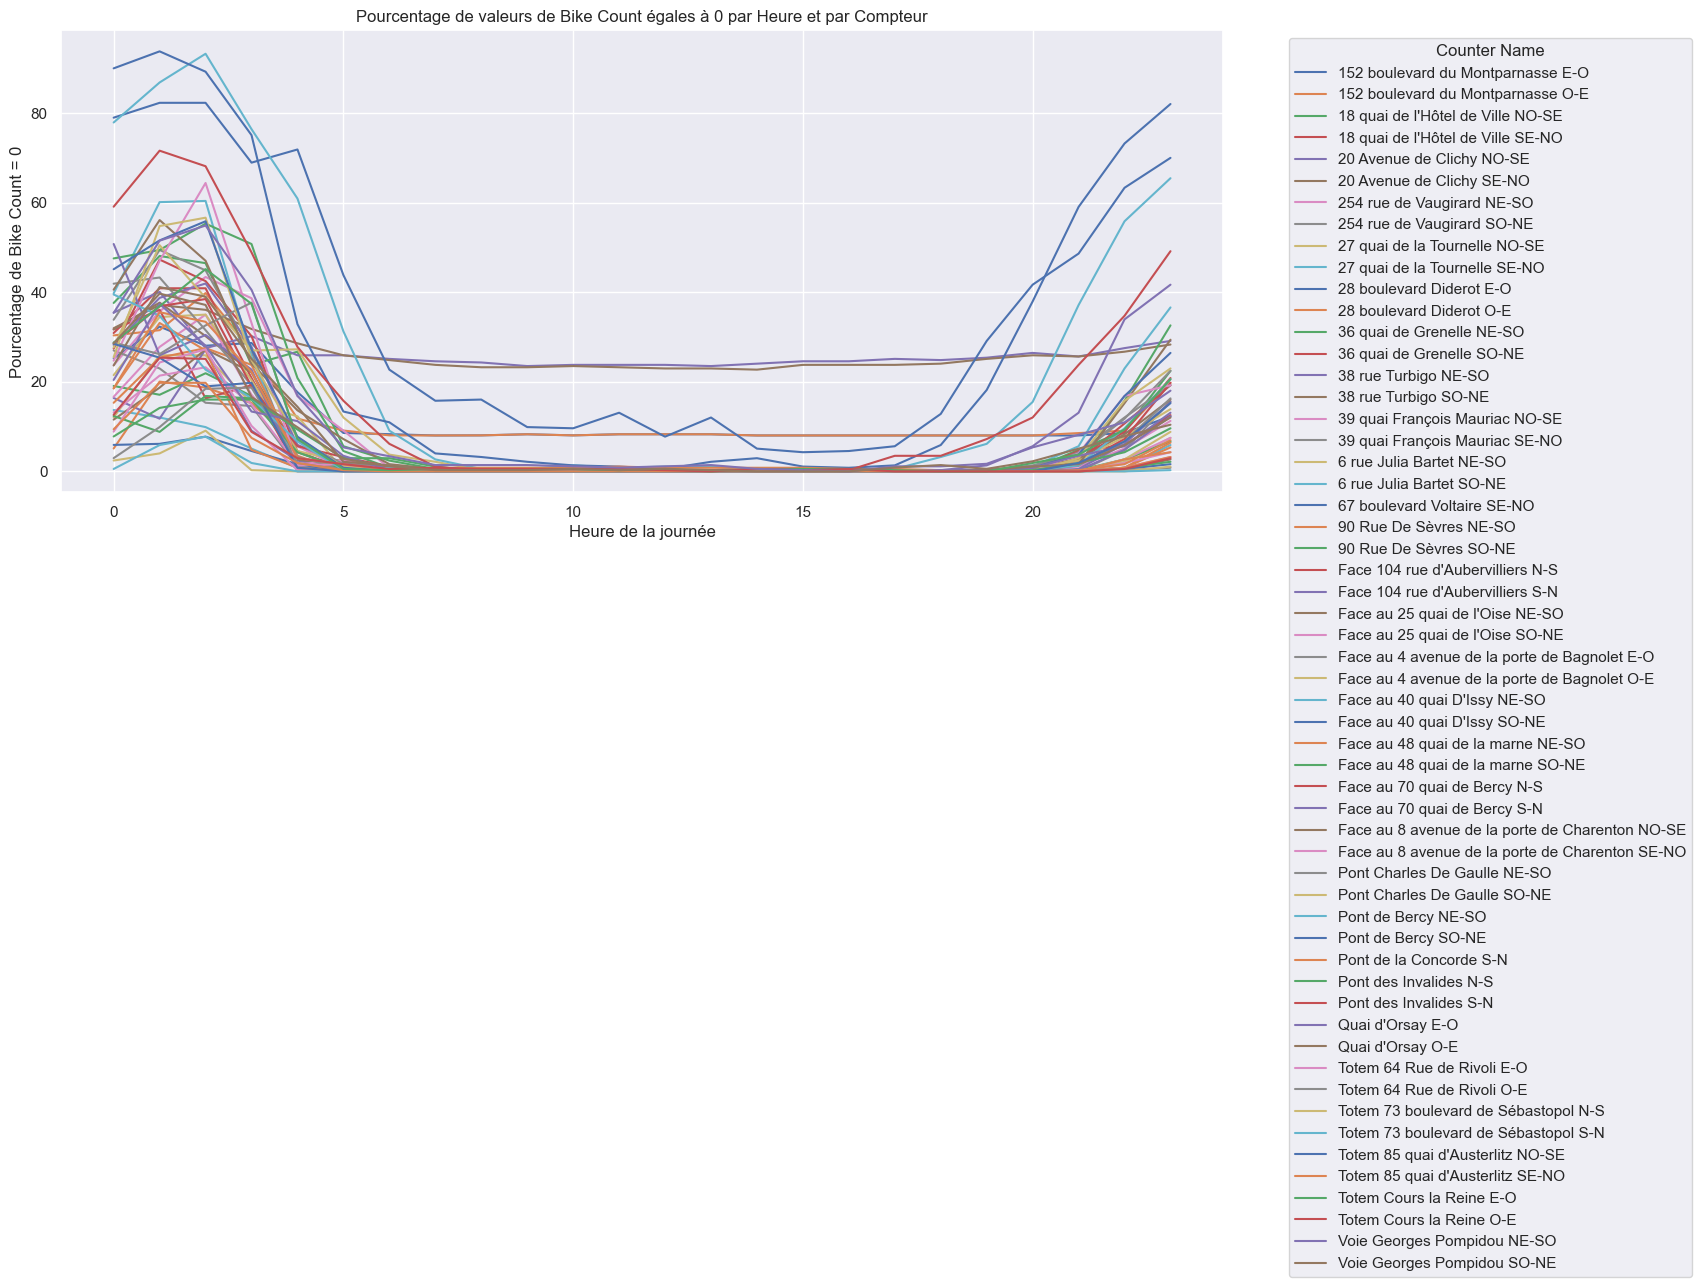

In [ ]:
data["bike_count_is_zero"] = data["bike_count"] == 0

df_grouped = (
    data.groupby(["counter_name", "hour"])["bike_count_is_zero"]
    .agg(["sum", "count"])
    .reset_index()
)

df_grouped["percentage_zero"] = df_grouped["sum"] / df_grouped["count"] * 100

plt.figure(figsize=(15, 6))
for counter in df_grouped["counter_name"].unique():
    counter_data = df_grouped[df_grouped["counter_name"] == counter]
    plt.plot(counter_data["hour"], counter_data["percentage_zero"], label=counter)

plt.title("Pourcentage de valeurs de Bike Count égales à 0 par Heure et par Compteur")
plt.xlabel("Heure de la journée")
plt.ylabel("Pourcentage de Bike Count = 0")
plt.legend(title="Counter Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.tight_layout()
plt.show()

In [36]:
data = data.drop("bike_count_is_zero", axis=1)
data = data.drop("date_only", axis=1)
data = data.drop("year_week", axis=1)
data = data.drop("week", axis=1)


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  category      
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

### Process calendar information : holidays and covid

In [37]:
def _add_holiday(X):
    link_bank_holiday = (
        "https://www.data.gouv.fr/fr/datasets/r/6637991e-c4d8-4cd6-854e-ce33c5ab49d5"
    )
    link_vacance_scolaire = (
        "https://www.data.gouv.fr/fr/datasets/r/9957d723-346e-4317-8cb3-293c94e19b2d"
    )
    start_calendar = np.min(X["date"])
    end_calendar = np.max(X["date"])
    df_bank_holiday = pd.read_csv(link_bank_holiday)
    df_bank_holiday["date"] = pd.to_datetime(df_bank_holiday["date"]).dt.date

    df_holidays = pd.read_csv(link_vacance_scolaire, sep=";")
    df_holidays = df_holidays[df_holidays["Zones"].isin(["Zone C"])]
    df_holidays = df_holidays.drop_duplicates(
        subset=["Zones", "Description", "annee_scolaire"]
    )

    df_holidays["Date de début"] = pd.to_datetime(
        df_holidays["Date de début"].str[0:10]
    )
    df_holidays["Date de fin"] = pd.to_datetime(df_holidays["Date de fin"].str[0:10])

    df_calendar = pd.DataFrame(
        index=pd.date_range(start=start_calendar, end=end_calendar)
    )
    df_calendar["date"] = df_calendar.index.date
    df_calendar["is_bank_holiday"] = 0
    df_calendar.loc[
        df_calendar["date"].isin(df_bank_holiday["date"]), "is_bank_holiday"
    ] = 1

    df_calendar["is_holidays"] = 0
    for _, row in df_holidays.iterrows():
        date_start = row["Date de début"].date()
        date_end = row["Date de fin"].date()
        df_calendar.loc[
            (df_calendar["date"] >= date_start) & (df_calendar["date"] <= date_end),
            "is_holidays",
        ] = 1

    X = X.copy()
    X["date"] = X["date"].astype("datetime64[ns]")
    df_calendar["date"] = df_calendar["date"].astype("datetime64[ns]")

    X["orig_index"] = np.arange(X.shape[0])
    X = pd.merge_asof(
        X.sort_values("date"),
        df_calendar[["date", "is_holidays", "is_bank_holiday"]].sort_values("date"),
        on="date",
    )
    # Sort back to the original order
    X = X.sort_values("orig_index")
    del X["orig_index"]
    return X

In [38]:
def _add_covid(X):
    start_calendar = np.min(X["date"])
    end_calendar = np.max(X["date"])

    df_calendar = pd.DataFrame(
        index=pd.date_range(start=start_calendar, end=end_calendar)
    )

    df_calendar["date"] = df_calendar.index.date

    df_calendar["is_lockdown"] = 0

    date_start_1 = pd.to_datetime("2020-10-30").date()
    date_end_1 = pd.to_datetime("2020-12-15").date()

    df_calendar.loc[
        (df_calendar["date"] >= date_start_1) & (df_calendar["date"] <= date_end_1),
        "is_lockdown",
    ] = 1

    date_start_2 = pd.to_datetime("2021-04-03").date()
    date_end_2 = pd.to_datetime("2021-05-09").date()

    df_calendar.loc[
        (df_calendar["date"] >= date_start_2) & (df_calendar["date"] <= date_end_2),
        "is_lockdown",
    ] = 1

    X = X.copy()
    X["date"] = X["date"].astype("datetime64[ns]")
    df_calendar["date"] = df_calendar["date"].astype("datetime64[ns]")

    X["orig_index"] = np.arange(X.shape[0])
    X = pd.merge_asof(
        X.sort_values("date"),
        df_calendar[["date", "is_lockdown"]].sort_values("date"),
        on="date",
    )
    # Sort back to the original order
    X = X.sort_values("orig_index")
    del X["orig_index"]
    return X

In [39]:
data = _add_covid(data)
data = _add_holiday(data)
data

counter_id                counter_name    site_id  \
107     100007049-102007049    28 boulevard Diderot E-O  100007049   
153     100007049-102007049    28 boulevard Diderot E-O  100007049   
201     100007049-102007049    28 boulevard Diderot E-O  100007049   
782     100007049-102007049    28 boulevard Diderot E-O  100007049   
925     100007049-102007049    28 boulevard Diderot E-O  100007049   
...                     ...                         ...        ...   
495819  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496091  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496354  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496719  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496826  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   

                   site_name  bike_count                date  \
107     28 boulevard Diderot         0.0 2020-09-01 02:00:00   
153     28 boulevard Diderot         1.0 2020-09-01 03:00:00   
201     28 boulevard Diderot         0.0 2020-09-01 04:00:00   
782     28 boulevard Diderot         4.0 2020-09-01 15:00:00   
925     28 boulevard Diderot         9.0 2020-09-01 18:00:00   
...                      ...         ...                 ...   
495819  254 rue de Vaugirard       445.0 2021-09-09 06:00:00   
496091  254 rue de Vaugirard       145.0 2021-09-09 10:00:00   
496354  254 rue de Vaugirard       218.0 2021-09-09 15:00:00   
496719  254 rue de Vaugirard        21.0 2021-09-09 22:00:00   
496826  254 rue de Vaugirard        15.0 2021-09-09 23:00:00   

       counter_installation_date         coordinates counter_technical_id  \
107                   2013-01-18  48.846028,2.375429          Y2H15027244   
153                   2013-01-18  48.846028,2.375429          Y2H15027244   
201                   2013-01-18  48.846028,2.375429          Y2H15027244   
782                   2013-01-18  48.846028,2.375429          Y2H15027244   
925                   2013-01-18  48.846028,2.375429          Y2H15027244   
...                          ...                 ...                  ...   
495819                2020-11-29    48.83977,2.30198          Y2H20114504   
496091                2020-11-29    48.83977,2.30198          Y2H20114504   
496354                2020-11-29    48.83977,2.30198          Y2H20114504   
496719                2020-11-29    48.83977,2.30198          Y2H20114504   
496826                2020-11-29    48.83977,2.30198          Y2H20114504   

         latitude  ...  day  weekday  weekend?  hour  dayofyear  time_of_day  \
107     48.846028  ...    1        1         0     2        245            6   
153     48.846028  ...    1        1         0     3        245            6   
201     48.846028  ...    1        1         0     4        245            1   
782     48.846028  ...    1        1         0    15        245            4   
925     48.846028  ...    1        1         0    18        245            5   
...           ...  ...  ...      ...       ...   ...        ...          ...   
495819  48.839770  ...    9        3         0     6        252            1   
496091  48.839770  ...    9        3         0    10        252            3   
496354  48.839770  ...    9        3         0    15        252            4   
496719  48.839770  ...    9        3         0    22        252            5   
496826  48.839770  ...    9        3         0    23        252            6   

        season  is_lockdown  is_holidays  is_bank_holiday  
107          4            0            0                0  
153          4            0            0                0  
201          4            0            0                0  
782          4            0            0                0  
925          4            0            0                0  
...        ...          ...          ...              ...  
495819       4            0            0                0  
496091       4            0            0 

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 107 to 496826
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  category      
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[ns]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64    

### Process weather information

In [41]:
def _merge_external_data(X):
    df_ext = pd.read_csv(
        "external_data/external_data_cleaned.csv", parse_dates=["date"]
    )

    X = X.copy()

    X["date"] = X["date"].astype("datetime64[ns]")
    df_ext["date"] = df_ext["date"].astype("datetime64[ns]")

    # When using merge_asof left frame need to be sorted
    X["orig_index"] = np.arange(X.shape[0])
    X = pd.merge_asof(
        X.sort_values("date"),
        df_ext.sort_values("date"),
        on="date",
    )
    # Sort back to the original order
    X = X.sort_values("orig_index")
    del X["orig_index"]
    return X

In [42]:
data = _merge_external_data(data)
data

counter_id                counter_name    site_id  \
107     100007049-102007049    28 boulevard Diderot E-O  100007049   
153     100007049-102007049    28 boulevard Diderot E-O  100007049   
201     100007049-102007049    28 boulevard Diderot E-O  100007049   
782     100007049-102007049    28 boulevard Diderot E-O  100007049   
925     100007049-102007049    28 boulevard Diderot E-O  100007049   
...                     ...                         ...        ...   
495819  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496091  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496354  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496719  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496826  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   

                   site_name  bike_count                date  \
107     28 boulevard Diderot         0.0 2020-09-01 02:00:00   
153     28 boulevard Diderot         1.0 2020-09-01 03:00:00   
201     28 boulevard Diderot         0.0 2020-09-01 04:00:00   
782     28 boulevard Diderot         4.0 2020-09-01 15:00:00   
925     28 boulevard Diderot         9.0 2020-09-01 18:00:00   
...                      ...         ...                 ...   
495819  254 rue de Vaugirard       445.0 2021-09-09 06:00:00   
496091  254 rue de Vaugirard       145.0 2021-09-09 10:00:00   
496354  254 rue de Vaugirard       218.0 2021-09-09 15:00:00   
496719  254 rue de Vaugirard        21.0 2021-09-09 22:00:00   
496826  254 rue de Vaugirard        15.0 2021-09-09 23:00:00   

       counter_installation_date         coordinates counter_technical_id  \
107                   2013-01-18  48.846028,2.375429          Y2H15027244   
153                   2013-01-18  48.846028,2.375429          Y2H15027244   
201                   2013-01-18  48.846028,2.375429          Y2H15027244   
782                   2013-01-18  48.846028,2.375429          Y2H15027244   
925                   2013-01-18  48.846028,2.375429          Y2H15027244   
...                          ...                 ...                  ...   
495819                2020-11-29    48.83977,2.30198          Y2H20114504   
496091                2020-11-29    48.83977,2.30198          Y2H20114504   
496354                2020-11-29    48.83977,2.30198          Y2H20114504   
496719                2020-11-29    48.83977,2.30198          Y2H20114504   
496826                2020-11-29    48.83977,2.30198          Y2H20114504   

         latitude  ...  ssfrai  etat_sol  ht_neige  \
107     48.846028  ...     0.0       0.0       0.0   
153     48.846028  ...     0.0       0.0       0.0   
201     48.846028  ...     0.0       0.0       0.0   
782     48.846028  ...     0.0       0.0       0.0   
925     48.846028  ...     0.0       0.0       0.0   
...           ...  ...     ...       ...       ...   
495819  48.839770  ...     0.0       1.0       0.0   
496091  48.839770  ...     0.0       0.0       0.0   
496354  48.839770  ...     0.0       0.0       0.0   
496719  48.839770  ...     0.0       1.0       0.0   
496826  48.839770  ...     0.0       1.0       0.0   

                                           ww description      n  nbas  \
107     Clouds generally dissolving or becoming less d...    0.0   0.0   
153                   State of sky on the whole unchanged    0.0   0.0   
201                   State of sky on the whole unchanged    0.0   0.0   
782                Clouds generally forming or developing   60.0   5.0   
925                   State of sky on the whole unchanged   90.0   7.0   
...                                                   ...    ...   ...   
495819                                               Mist  100.0   8.0   
496091                State of sky on the whole unchanged  100.0   8.0   
496354                State of sky on the whole unchanged   75.0   5.0   
496719             Clouds generally forming or developing   50.0   3.0   
496826             

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 107 to 496826
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  category      
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[ns]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64    

### Process Geographic information

In [44]:
def add_arrondissement_with_geopandas(X, shapefile_path):
    arrondissements = gpd.read_file(shapefile_path)

    X = X.copy()
    X["geometry"] = X.apply(
        lambda row: Point(row["longitude"], row["latitude"]), axis=1
    )
    gdf = gpd.GeoDataFrame(X, geometry="geometry", crs=arrondissements.crs)

    merged = gpd.sjoin(gdf, arrondissements, how="left", predicate="within")

    X["district"] = merged["c_ar"].fillna(21).astype(int)

    return X

In [45]:
shapefile_path = "external_data/arrondissements.shp"
data = add_arrondissement_with_geopandas(data, shapefile_path)
data

counter_id                counter_name    site_id  \
107     100007049-102007049    28 boulevard Diderot E-O  100007049   
153     100007049-102007049    28 boulevard Diderot E-O  100007049   
201     100007049-102007049    28 boulevard Diderot E-O  100007049   
782     100007049-102007049    28 boulevard Diderot E-O  100007049   
925     100007049-102007049    28 boulevard Diderot E-O  100007049   
...                     ...                         ...        ...   
495819  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496091  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496354  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496719  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
496826  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   

                   site_name  bike_count                date  \
107     28 boulevard Diderot         0.0 2020-09-01 02:00:00   
153     28 boulevard Diderot         1.0 2020-09-01 03:00:00   
201     28 boulevard Diderot         0.0 2020-09-01 04:00:00   
782     28 boulevard Diderot         4.0 2020-09-01 15:00:00   
925     28 boulevard Diderot         9.0 2020-09-01 18:00:00   
...                      ...         ...                 ...   
495819  254 rue de Vaugirard       445.0 2021-09-09 06:00:00   
496091  254 rue de Vaugirard       145.0 2021-09-09 10:00:00   
496354  254 rue de Vaugirard       218.0 2021-09-09 15:00:00   
496719  254 rue de Vaugirard        21.0 2021-09-09 22:00:00   
496826  254 rue de Vaugirard        15.0 2021-09-09 23:00:00   

       counter_installation_date         coordinates counter_technical_id  \
107                   2013-01-18  48.846028,2.375429          Y2H15027244   
153                   2013-01-18  48.846028,2.375429          Y2H15027244   
201                   2013-01-18  48.846028,2.375429          Y2H15027244   
782                   2013-01-18  48.846028,2.375429          Y2H15027244   
925                   2013-01-18  48.846028,2.375429          Y2H15027244   
...                          ...                 ...                  ...   
495819                2020-11-29    48.83977,2.30198          Y2H20114504   
496091                2020-11-29    48.83977,2.30198          Y2H20114504   
496354                2020-11-29    48.83977,2.30198          Y2H20114504   
496719                2020-11-29    48.83977,2.30198          Y2H20114504   
496826                2020-11-29    48.83977,2.30198          Y2H20114504   

         latitude  ...  ht_neige  \
107     48.846028  ...       0.0   
153     48.846028  ...       0.0   
201     48.846028  ...       0.0   
782     48.846028  ...       0.0   
925     48.846028  ...       0.0   
...           ...  ...       ...   
495819  48.839770  ...       0.0   
496091  48.839770  ...       0.0   
496354  48.839770  ...       0.0   
496719  48.839770  ...       0.0   
496826  48.839770  ...       0.0   

                                           ww description      n  nbas  \
107     Clouds generally dissolving or becoming less d...    0.0   0.0   
153                   State of sky on the whole unchanged    0.0   0.0   
201                   State of sky on the whole unchanged    0.0   0.0   
782                Clouds generally forming or developing   60.0   5.0   
925                   State of sky on the whole unchanged   90.0   7.0   
...                                                   ...    ...   ...   
495819                                               Mist  100.0   8.0   
496091                State of sky on the whole unchanged  100.0   8.0   
496354                State of sky on the whole unchanged   75.0   5.0   
496719             Clouds generally forming or developing   50.0   3.0   
496826             Clouds generally forming or developing   50.0   3.0   

          hbas       t      td  tend24                    geometry  district  
107     1750.0  285.75  282.55   120.0  POINT (2.375429 48.846028)        12  
15

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 107 to 496826
Data columns (total 50 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  category      
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[ns]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64    

# Linear test

In [145]:
df = data.copy().drop("bike_count", axis=1)

In [66]:
def train_test_split_temporal(X, y, delta_threshold="30 days"):

    cutoff_date = X["date"].max() - pd.Timedelta(delta_threshold)
    mask = X["date"] <= cutoff_date
    X_train, X_valid = X.loc[mask], X.loc[~mask]
    y_train, y_valid = y[mask], y[~mask]

    return X_train, y_train, X_valid, y_valid

In [147]:
X_train, y_train, X_valid, y_valid = train_test_split_temporal(
    df.drop("log_bike_count", axis=1), df["log_bike_count"]
)

print(
    f'Train: n_samples={X_train.shape[0]},  {X_train["date"].min()} to {X_train["date"].max()}'
)
print(
    f'Valid: n_samples={X_valid.shape[0]},  {X_valid["date"].min()} to {X_valid["date"].max()}'
)

Train: n_samples=456507,  2020-09-01 01:00:00 to 2021-08-10 23:00:00
Valid: n_samples=40320,  2021-08-11 00:00:00 to 2021-09-09 23:00:00


In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

data_num = X_train.select_dtypes(include=["int", "float"])
data_cat = X_train.drop(["date", "geometry"], axis=1).select_dtypes(
    exclude=["int", "float"]
)

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = data_cat.columns

numerical_scaler = StandardScaler()
numerical_cols = data_num.columns

preprocessor = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_cols),
        ("num", numerical_scaler, numerical_cols),
    ]
)

regressor = Ridge()

pipe = make_pipeline(preprocessor, regressor)
pipe.fit(X_train, y_train)


print(f"Train set, RMSE={root_mean_squared_error(y_train, pipe.predict(X_train)):.5f}")
print(f"Valid set, RMSE={root_mean_squared_error(y_valid, pipe.predict(X_valid)):.5f}")

Train set, RMSE=1.02072
Valid set, RMSE=0.82837


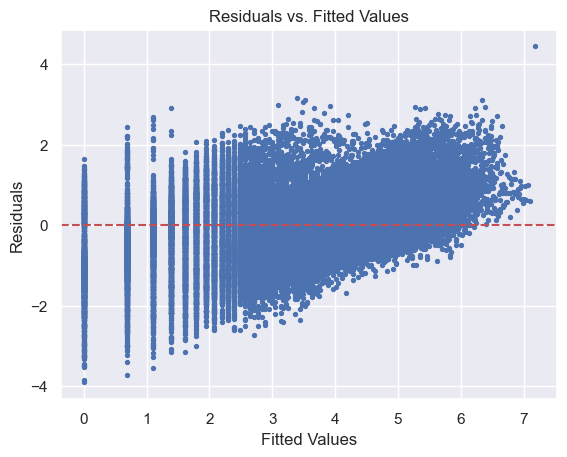

In [149]:
residuals = y_valid - pipe.predict(X_valid)

# Residuals vs. Fitted Values Plot
plt.scatter(y_valid, residuals, s=8)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# Feature Selection

### Select KBest

In [47]:
df = data.copy().drop("bike_count", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 107 to 496826
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  category      
 3   site_name                  496827 non-null  category      
 4   date                       496827 non-null  datetime64[ns]
 5   counter_installation_date  496827 non-null  datetime64[us]
 6   coordinates                496827 non-null  category      
 7   counter_technical_id       496827 non-null  category      
 8   latitude                   496827 non-null  float64       
 9   longitude                  496827 non-null  float64       
 10  log_bike_count             496827 non-null  float64       
 11  year                       496827 non-null  int32      

In [3]:
X_train, y_train, X_valid, y_valid = train_test_split_temporal(
    df.drop("log_bike_count", axis=1), df["log_bike_count"]
)

print(
    f'Train: n_samples={X_train.shape[0]},  {X_train["date"].min()} to {X_train["date"].max()}'
)
print(
    f'Valid: n_samples={X_valid.shape[0]},  {X_valid["date"].min()} to {X_valid["date"].max()}'
)

NameError: name 'train_test_split_temporal' is not defined

In [ ]:
X_train_num = X_train.select_dtypes(include=["int", "float"])

: 

: 

: 

: 

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression


def SelectKBest_mutual(X, y, k):
    """
    Perform feature selection using SelectKBest with mutual information regression.

    Parameters:
        X (DataFrame): Independent variables.
        y (Series): Dependent variable.
        k (int): Number of top features to select.

    Returns:
        DataFrame: Comparative table showing the statistical significance of features.
    """
    # Initialize SelectKBest with mutual information regression
    selector = SelectKBest(score_func=mutual_info_regression, k=k)

    # Fit selector to data
    selector.fit(X, y)

    # Get selected feature indices
    selected_indices = selector.get_support(indices=True)

    # Get names of selected features
    selected_features = X.columns[selected_indices]

    # Get feature scores
    scores = selector.scores_[selected_indices]

    # Create a comparative table
    feature_table = pd.DataFrame({"Feature": selected_features, "Score": scores})
    feature_table = feature_table.sort_values(by="Score", ascending=False).reset_index(
        drop=True
    )

    return feature_table


# Apply the function
# best_20 = SelectKBest_mutual(X_train_num, y_train, 20)

# best_20

: 

: 

: 

: 

### RFECV

In [57]:
df = data.copy().drop("bike_count", axis=1)
df = df.copy().drop(
    [
        "counter_id",
        "site_id",
        "site_name",
        "coordinates",
        "counter_technical_id",
        "geometry",
        "ww description",
        "date",
    ],
    axis=1,
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 107 to 496826
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_name               496827 non-null  category      
 1   counter_installation_date  496827 non-null  datetime64[us]
 2   latitude                   496827 non-null  float64       
 3   longitude                  496827 non-null  float64       
 4   log_bike_count             496827 non-null  float64       
 5   year                       496827 non-null  int32         
 6   month                      496827 non-null  int32         
 7   week_number                496827 non-null  UInt32        
 8   day                        496827 non-null  int32         
 9   weekday                    496827 non-null  int32         
 10  weekend?                   496827 non-null  int64         
 11  hour                       496827 non-null  int32      

In [58]:
df["week_number"].value_counts()

week_number
36    13098
24     9408
15     9408
16     9408
17     9408
18     9408
19     9408
20     9408
21     9408
22     9408
23     9408
25     9408
7      9408
26     9408
27     9408
28     9408
29     9408
30     9408
31     9408
32     9408
33     9408
34     9408
14     9408
9      9408
6      9408
5      9408
52     9408
53     9408
1      9408
2      9408
3      9408
51     9408
35     9408
4      9404
8      9400
10     9310
13     9268
50     9266
12     9072
44     9072
38     9072
39     9072
41     9072
42     9072
46     9072
45     9072
11     9072
48     9072
49     9072
37     9072
47     9072
40     9071
43     9018
Name: count, dtype: Int64

In [59]:
week_num_sample = [i for i in range(2, 56, 3)]

# Create a boolean mask for rows to keep in the DataFrame
df_sample = df[df["week_number"].isin(week_num_sample)]
y_sample = df_sample["log_bike_count"]
X_sample = df_sample.drop(columns="log_bike_count", axis=1)

In [60]:
X_sample_num = X_sample.select_dtypes(include=["int", "float"])
X_sample_num = X_sample_num.drop(
    ["weekend?", "is_lockdown", "is_holidays", "is_bank_holiday"], axis=1
)
X_sample_num.columns
X_sample_cat = X_sample.select_dtypes(exclude=["int", "float"])

ordinal_cols = ["counter_installation_date"]
onehot_cols = ["counter_name"]
scale_cols = X_sample_num.columns

In [61]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


scaler = StandardScaler()
onehot = OneHotEncoder(sparse_output=False)
ordinal = OrdinalEncoder()

X_sample[scale_cols] = scaler.fit_transform(X_sample[scale_cols])

onehot_encoded = onehot.fit_transform(X_sample[onehot_cols])
onehot_columns = onehot.get_feature_names_out(onehot_cols)
X_sample_onehot = pd.DataFrame(
    onehot_encoded, columns=onehot_columns, index=X_sample.index
)
X_sample = X_sample.drop(columns=onehot_cols)
X_sample = pd.concat([X_sample, X_sample_onehot], axis=1)

X_sample[ordinal_cols] = ordinal.fit_transform(X_sample[ordinal_cols])

X_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167514 entries, 16868 to 491400
Data columns (total 95 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   counter_installation_date                                     167514 non-null  float64
 1   latitude                                                      167514 non-null  float64
 2   longitude                                                     167514 non-null  float64
 3   year                                                          167514 non-null  float64
 4   month                                                         167514 non-null  float64
 5   week_number                                                   167514 non-null  UInt32 
 6   day                                                           167514 non-null  float64
 7   weekday                                                  

In [63]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import TimeSeriesSplit

estimator = XGBRegressor(random_state=2512)

# Set the minimum number of features to be selected
min_features_to_select = 1

# Set the cross-validation splitting strategy
cv = TimeSeriesSplit(5)

# Create a RFECV object using the estimator
rfecv = RFECV(estimator, min_features_to_select=min_features_to_select, cv=cv)

# Fit the data
rfecv.fit(X_sample, y_sample)

# Get integer index of the features selected
feature_index = rfecv.get_support(indices=True)

# Get a mask of the features selected
feature_mask = rfecv.support_

# Get selected feature names
feature_names = rfecv.get_feature_names_out()

# Get the number of features retained
feature_number = rfecv.n_features_

# Get results
results = pd.DataFrame(rfecv.cv_results_)

# Get RFECV score
rfecv_score = rfecv.score(X_sample, y_sample)

# Print feature number, names and score
print("Original feature number:", len(X_sample.columns))
print("Optimal feature number:", feature_number)
print("Selected features:", feature_names)
print("Score:", rfecv_score)

Original feature number: 95
Optimal feature number: 48
Selected features: ['counter_installation_date' 'latitude' 'longitude' 'week_number'
 'weekday' 'hour' 'dayofyear' 'time_of_day' 'season' 'is_lockdown'
 'is_holidays' 'is_bank_holiday' 'u' 'w1' 'ht_neige' 't' 'district'
 "counter_name_18 quai de l'Hôtel de Ville NO-SE"
 'counter_name_254 rue de Vaugirard NE-SO'
 'counter_name_254 rue de Vaugirard SO-NE'
 'counter_name_27 quai de la Tournelle SE-NO'
 'counter_name_28 boulevard Diderot E-O'
 'counter_name_28 boulevard Diderot O-E'
 'counter_name_36 quai de Grenelle NE-SO'
 'counter_name_38 rue Turbigo SO-NE'
 'counter_name_39 quai François Mauriac SE-NO'
 'counter_name_6 rue Julia Bartet NE-SO'
 'counter_name_6 rue Julia Bartet SO-NE'
 'counter_name_67 boulevard Voltaire SE-NO'
 'counter_name_90 Rue De Sèvres NE-SO'
 'counter_name_90 Rue De Sèvres SO-NE'
 "counter_name_Face 104 rue d'Aubervilliers N-S"
 "counter_name_Face 104 rue d'Aubervilliers S-N"
 'counter_name_Face au 4 avenue d

# Model

In [70]:
df = data[
    [
        "date",
        "counter_installation_date",
        "latitude",
        "longitude",
        "year",
        "month",
        "day",
        "week_number",
        "weekday",
        "hour",
        "dayofyear",
        "time_of_day",
        "season",
        "is_lockdown",
        "is_holidays",
        "is_bank_holiday",
        "pres",
        "u",
        "tend",
        "ww",
        "rr6",
        "rr12",
        "rr24",
        "etat_sol",
        "ht_neige",
        "n",
        "t",
        "td",
        "tend24",
        "district",
        "counter_name",
        "log_bike_count",
    ]
]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 107 to 496826
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       496827 non-null  datetime64[ns]
 1   counter_installation_date  496827 non-null  datetime64[us]
 2   latitude                   496827 non-null  float64       
 3   longitude                  496827 non-null  float64       
 4   year                       496827 non-null  int32         
 5   month                      496827 non-null  int32         
 6   day                        496827 non-null  int32         
 7   week_number                496827 non-null  UInt32        
 8   weekday                    496827 non-null  int32         
 9   hour                       496827 non-null  int32         
 10  dayofyear                  496827 non-null  int32         
 11  time_of_day                496827 non-null  int64      

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor

X_train, y_train, X_valid, y_valid = train_test_split_temporal(
    df.drop("log_bike_count", axis=1), df["log_bike_count"]
)

X_train = X_train.drop("date", axis=1)
X_valid = X_valid.drop("date", axis=1)

X_num = X_train.select_dtypes(include=["int", "float"])
X_num = X_num.drop(["is_lockdown", "is_holidays", "is_bank_holiday"], axis=1)

ordinal_cols = ["counter_installation_date"]
onehot_cols = ["counter_name"]
scale_cols = X_num.columns

scaler = StandardScaler()
onehot = OneHotEncoder(sparse_output=False)
ordinal = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("num", scaler, scale_cols),
        ("onehot", onehot, onehot_cols),
        ("ordinal", ordinal, ordinal_cols),
    ]
)

regressor = XGBRegressor()

pipe = make_pipeline(
    preprocessor,
    regressor,
)
pipe.fit(X_train, y_train)

print(f"Train set, RMSE={root_mean_squared_error(y_train, pipe.predict(X_train)):.5f}")
print(f"Valid set, RMSE={root_mean_squared_error(y_valid, pipe.predict(X_valid)):.5f}")

Train set, RMSE=0.39258
Valid set, RMSE=0.44946


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit


def objective(trial):
    # Définition des hyperparamètres à tuner
    param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e-1),
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "subsample": trial.suggest_uniform("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_loguniform("gamma", 1e-5, 1e-1),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-5, 1e-1),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-5, 1e-1),
    }
    ordinal_cols = ["counter_installation_date"]
    onehot_cols = ["counter_name"]
    scale_cols = X_num.columns

    scaler = StandardScaler()
    onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    ordinal = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=22)

    preprocessor = ColumnTransformer(
        [
            ("num", scaler, scale_cols),
            ("onehot", onehot, onehot_cols),
            ("ordinal", ordinal, ordinal_cols),
        ]
    )
    # Entraînement du modèle avec les paramètres proposés
    regressor = XGBRegressor(**param)
    pipe = make_pipeline(
        preprocessor,
        regressor,
    )
    pipe.fit(X_train, y_train)

    tscv = TimeSeriesSplit(n_splits=3)

    scores = cross_val_score(
        pipe,
        X_train,
        y_train,
        cv=tscv,
        n_jobs=-1,
        scoring="neg_root_mean_squared_error",
    )

    return np.mean(scores)

In [77]:
import optuna

study = optuna.create_study(direction="maximize")  # Minimiser le RMSE
study.optimize(objective, n_trials=100)  # Nombre d'essais à effectuer

# Résultats de l'optimisation
print("Meilleurs paramètres : ", study.best_params)
print("Meilleur RMSE : ", study.best_value)

[I 2024-12-11 12:30:19,346] A new study created in memory with name: no-name-87daf1ef-439a-4715-8252-e65181995e97
/var/folders/8z/2_mhw76x0cl3ryfqpm55hst40000gn/T/ipykernel_8881/833240403.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e-1),
/var/folders/8z/2_mhw76x0cl3ryfqpm55hst40000gn/T/ipykernel_8881/833240403.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.6, 1.0),
/var/folders/8z/2_mhw76x0cl3ryfqpm55hst40000gn/T/ipykernel_8881/833240403.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

Meilleurs paramètres :  {'max_depth': 10, 'learning_rate': 0.03758411108052076, 'n_estimators': 452, 'subsample': 0.8146926142904702, 'colsample_bytree': 0.838453719208161, 'min_child_weight': 9, 'gamma': 0.010218531432881407, 'reg_alpha': 2.2994203367699492e-05, 'reg_lambda': 2.0532974192471358e-05}
Meilleur RMSE :  -0.7987289632201312
